In [64]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

from os import listdir
from os.path import isfile, join

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']
if 'pygents.token_plot' in sys.modules:
    del sys.modules['pygents.token_plot']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot
from pygents.token_plot import *


## Build models on "Brown" corpus versions across English, Russian, Chinese

### Complete models

In [3]:
if True:
    file = 'data/corpora/Brown/brown_nolines_en.txt'
    brown_en_chars_7 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        brown_en_chars_7.train(lines)
        print('lines',len(lines))

    brown_en_chars_7.store('data/models/brown_en_chars_7')

    print('parameters',brown_en_chars_7.count_params())
#parameters 10,734,812


lines 14342
parameters 10734812


In [4]:
if True:
    file = 'data/corpora/Brown/brown_nolines_ru.txt'
    brown_ru_chars_7 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        brown_ru_chars_7.train(lines)
        print('lines',len(lines))

    brown_ru_chars_7.store('data/models/brown_ru_chars_7')

    print('parameters',brown_ru_chars_7.count_params())
#parameters 14,724,909


lines 14342
parameters 14724909


In [5]:
if True:
    file = 'data/corpora/Brown/brown_nolines_zh.txt'
    brown_zh_chars_7 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        brown_zh_chars_7.train(lines)
        print('lines',len(lines))

    brown_zh_chars_7.store('data/models/brown_zh_chars_7')

    print('parameters',brown_zh_chars_7.count_params())
#parameters 26,079,635


lines 14342
parameters 26079635


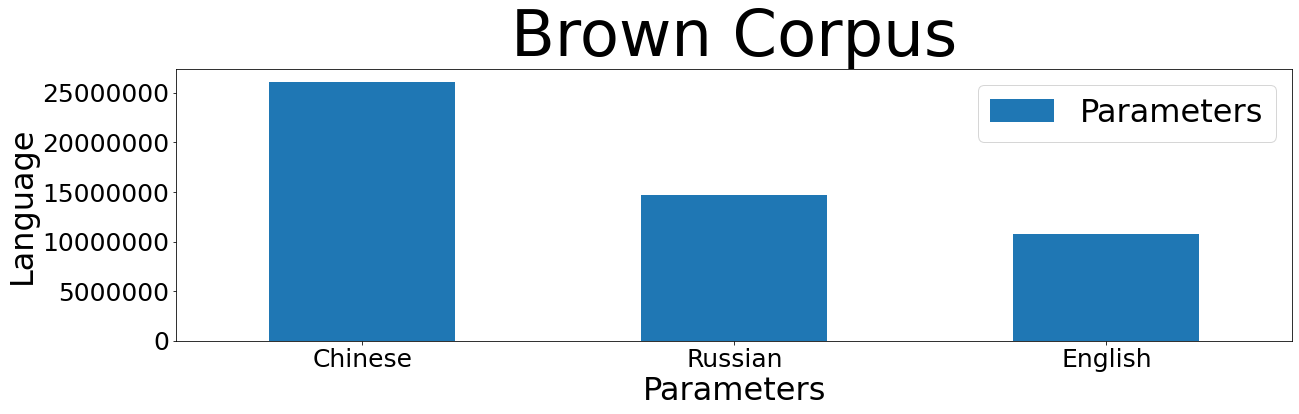

In [49]:
def plot_dict_bar(dic,labels,values,title=None,head=None,size=None,debug=False):
    plt.rcParams["figure.figsize"] = (20,5) if size is None else size 
    plt.rc('legend',fontsize=32)
    df = pd.DataFrame([(key, dic[key]) for key in dic],columns=[labels,values])
    df.sort_values(values,ascending=False,inplace=True)
    if debug:
        print(df)
    if head is not None:
        df = df[:head]
    p = df[[labels,values]].plot.bar(x=labels);
    p.get_yaxis().get_major_formatter().set_scientific(False)
    if title is not None:
        fontsize = 64 if len(title) < 64 else round(64 / len(title))
        plt.title(title,fontsize = fontsize)
    ticksize=1+round(24/len(labels[0]))
    p = plt.xticks(rotation='horizontal',fontsize=ticksize)
    p = plt.yticks(rotation='horizontal',fontsize=ticksize)
    plt.xlabel(values, fontsize=32)
    plt.ylabel(labels, fontsize=32)


plot_dict_bar({'English':10734812,'Russian':14724909,'Chinese':26079635},'Language','Parameters',title='Brown Corpus',
              head=None)


### Bi-split models for cross-validation

In [58]:
if True:
    file = 'data/corpora/Brown/brown_nolines_en.txt'
    brown_en_chars_7_test1 = FreedomTokenizer(max_n=7,mode='chars',debug=False)
    brown_en_chars_7_test2 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        lines1 = lines[1::2] # Elements from list1 starting from 1 iterating by 2
        lines2 = lines[::2] # Elements from list1 starting from 0 iterating by 2
        brown_en_chars_7_test1.train(lines1)
        brown_en_chars_7_test2.train(lines2)
        print('lines1',len(lines1))
        print('lines2',len(lines2))

    brown_en_chars_7_test1.store('data/models/brown_en_chars_7_test1')
    brown_en_chars_7_test2.store('data/models/brown_en_chars_7_test2')

    print('parameters 1',brown_en_chars_7_test1.count_params())
    print('parameters 2',brown_en_chars_7_test2.count_params())


lines1 7171
lines2 7171
parameters 1 7200678
parameters 2 7047337


In [59]:
if True:
    file = 'data/corpora/Brown/brown_nolines_ru.txt'
    brown_ru_chars_7_test1 = FreedomTokenizer(max_n=7,mode='chars',debug=False)
    brown_ru_chars_7_test2 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        lines1 = lines[1::2] # Elements from list1 starting from 1 iterating by 2
        lines2 = lines[::2] # Elements from list1 starting from 0 iterating by 2
        brown_ru_chars_7_test1.train(lines1)
        brown_ru_chars_7_test2.train(lines2)
        print('lines1',len(lines1))
        print('lines2',len(lines2))

    brown_ru_chars_7_test1.store('data/models/brown_ru_chars_7_test1')
    brown_ru_chars_7_test2.store('data/models/brown_ru_chars_7_test2')

    print('parameters 1',brown_ru_chars_7_test1.count_params())
    print('parameters 2',brown_ru_chars_7_test2.count_params())


lines1 7171
lines2 7171
parameters 1 9573010
parameters 2 9355647


In [60]:
if True:
    file = 'data/corpora/Brown/brown_nolines_zh.txt'
    brown_zh_chars_7_test1 = FreedomTokenizer(max_n=7,mode='chars',debug=False)
    brown_zh_chars_7_test2 = FreedomTokenizer(max_n=7,mode='chars',debug=False)

    with open(file,errors='ignore') as f:
        lines = f.readlines()
        lines1 = lines[1::2] # Elements from list1 starting from 1 iterating by 2
        lines2 = lines[::2] # Elements from list1 starting from 0 iterating by 2
        brown_zh_chars_7_test1.train(lines1)
        brown_zh_chars_7_test2.train(lines2)
        print('lines1',len(lines1))
        print('lines2',len(lines2))

    brown_zh_chars_7_test1.store('data/models/brown_zh_chars_7_test1')
    brown_zh_chars_7_test2.store('data/models/brown_zh_chars_7_test2')

    print('parameters 1',brown_zh_chars_7_test1.count_params())
    print('parameters 2',brown_zh_chars_7_test2.count_params())


lines1 7171
lines2 7171
parameters 1 13956109
parameters 2 13487762


## Perform meta-learning search for the best hyper-parameters with Magicdata test set

### English

In [70]:
path = '../../nlp/corpora/Chinese/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_en = list(test_df['en'])
print(len(test_en))
test_en


100


['What about medical insurance? As for my family, either an adult or a child will buy insurance.',
 'For those who have insurance, according to the insurance contract, they will get a compensation of 300 thousand yuan.',
 'Need to realize the importance of having insurance.',
 'In fact, this phenomenon is indeed very common, for instance, for personal accident insurance, the more you buy, the more you insure.',
 'It is really necessary for this generation of parents to buy insurance.',
 "Well, right now, it's really advisable to buy insurance.",
 'A car must be bought in full, and a house can be bought with a loan.',
 'You can buy insurance, insurance is of course divided into many categories.',
 'Medical insurance is very important.',
 "It's the insurance company that pays this part of the money.",
 "Xianghubao, I don't know if you ever heard about it, it is insurance in Alipay.",
 'Buying a house is actually an investment.',
 'Have you ever learned about the training of Ping An Insur

10734812


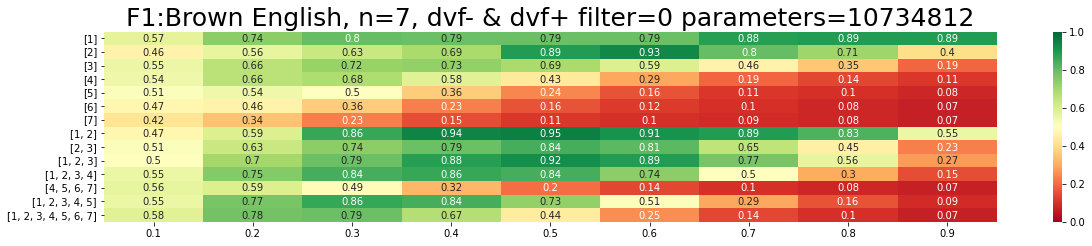

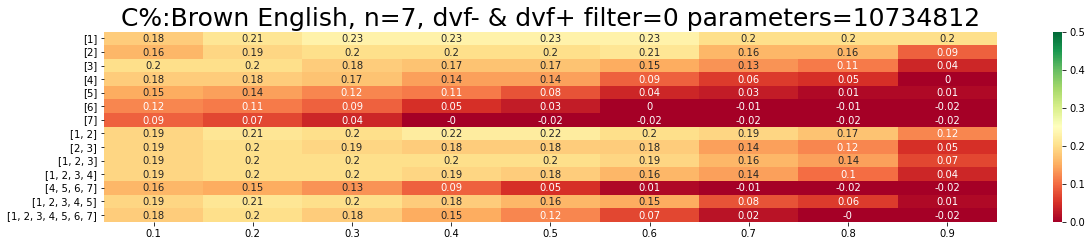

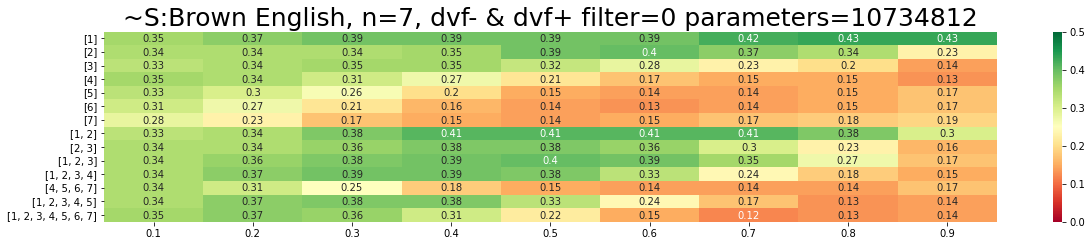

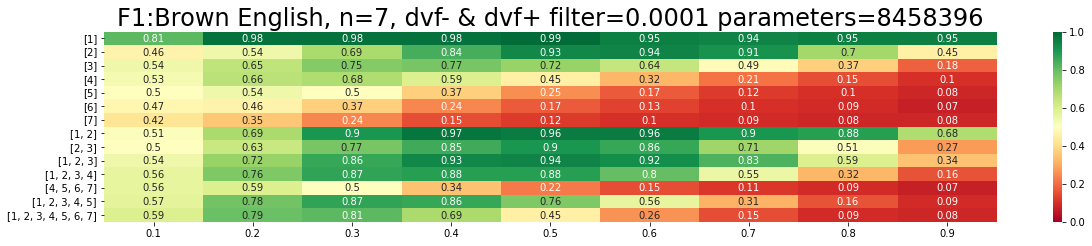

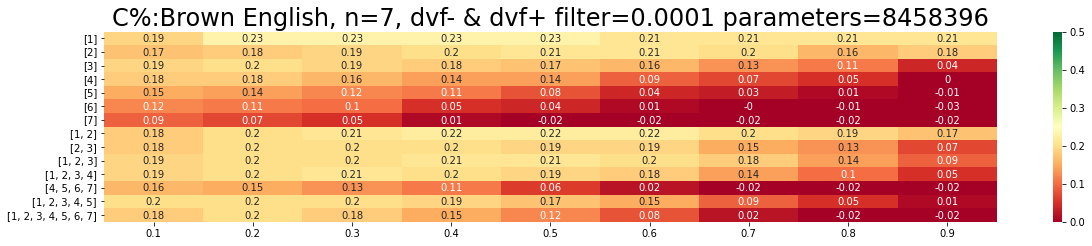

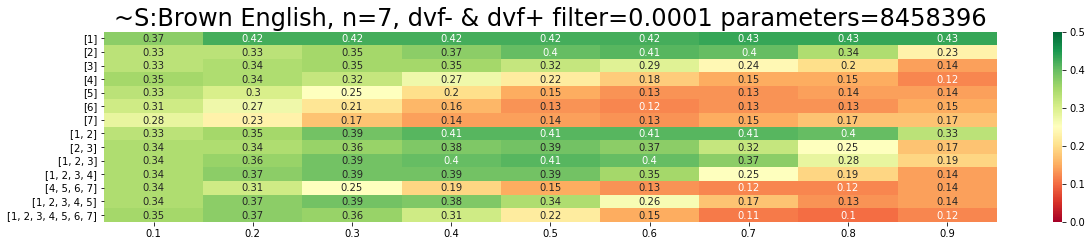

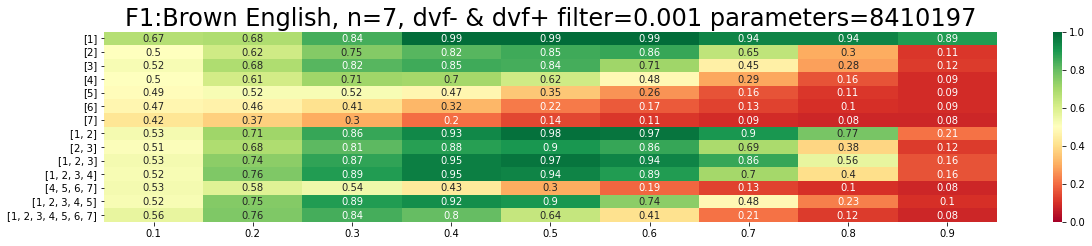

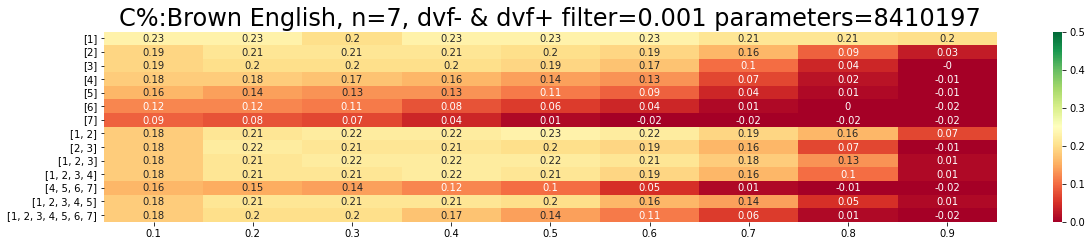

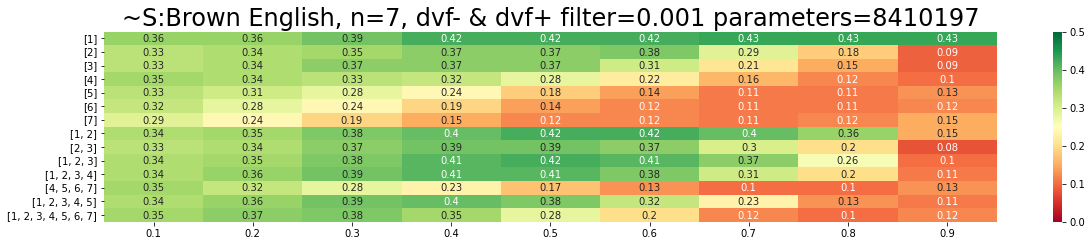

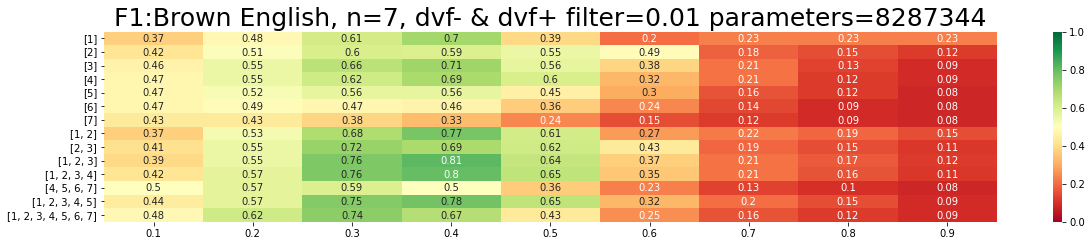

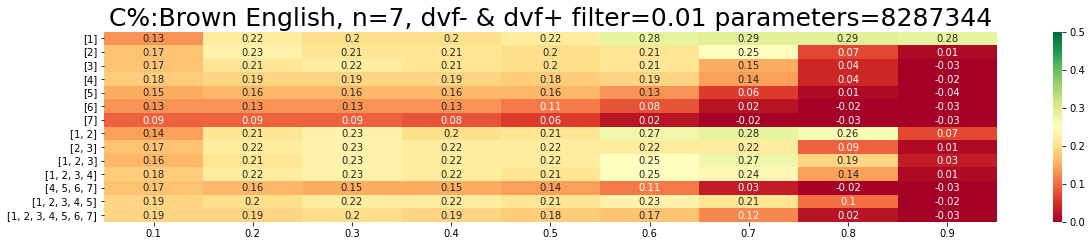

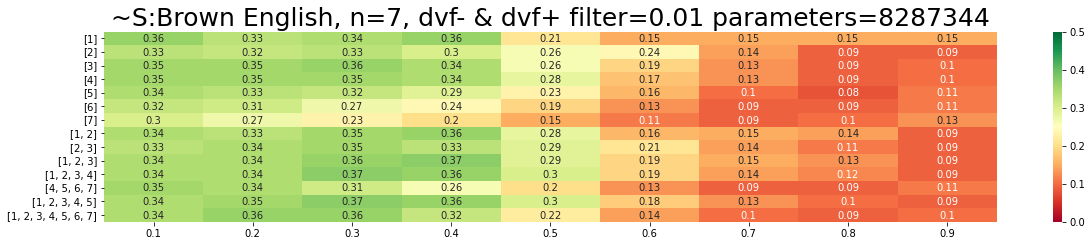

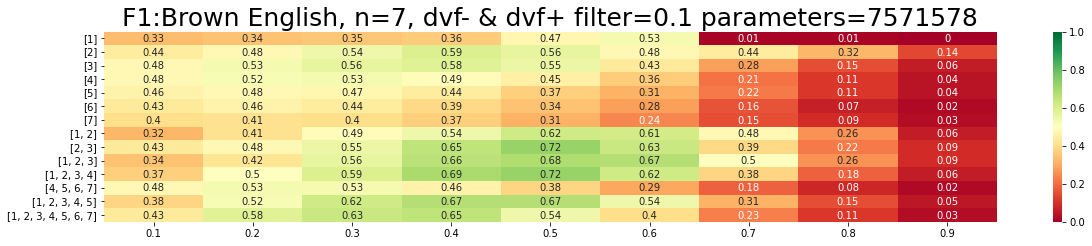

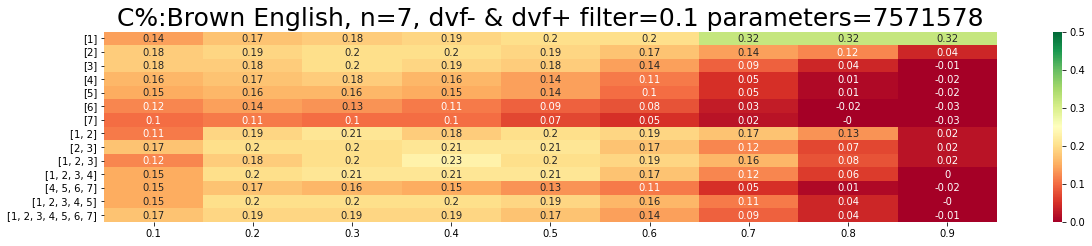

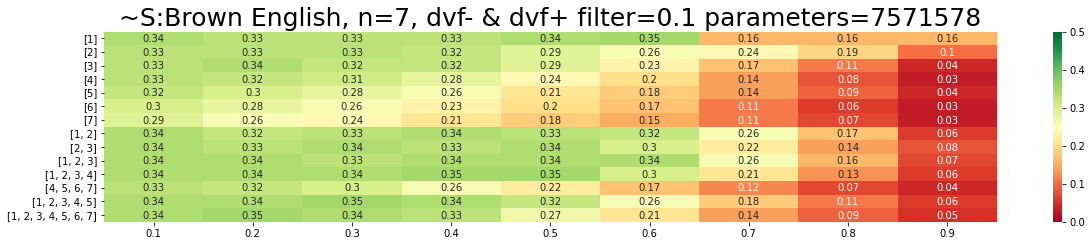

In [71]:
ref_tokenizer = DelimiterTokenizer()
model_thresholds = [0,0.0001,0.001,0.01,0.1]
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

base = FreedomTokenizer(name='data/models/brown_en_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown English, n=7, dvf- & dvf+'
metric100_list_en = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_en,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_en.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


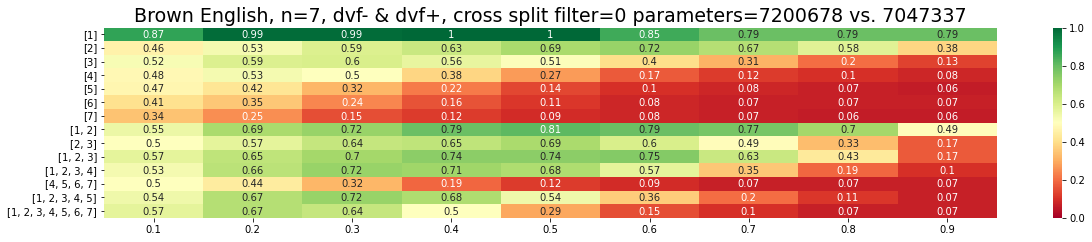

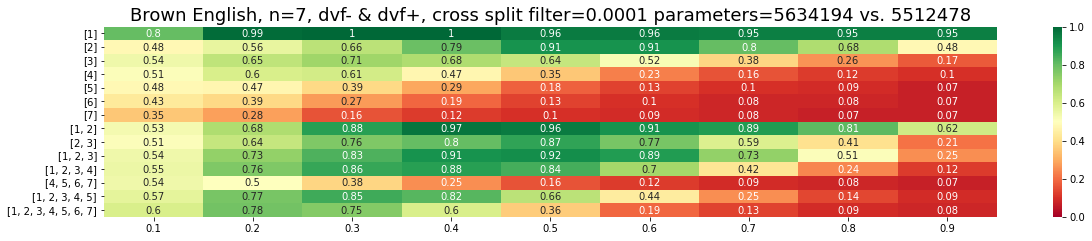

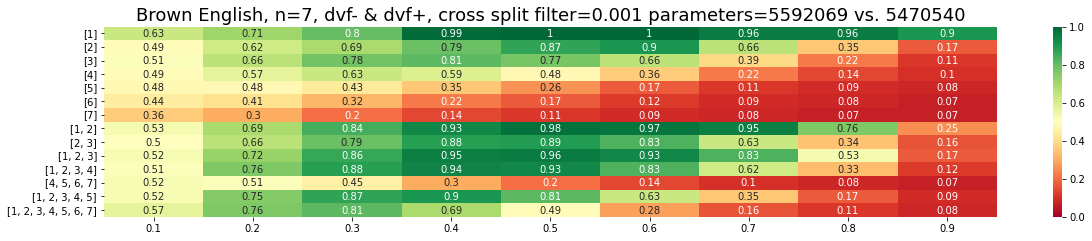

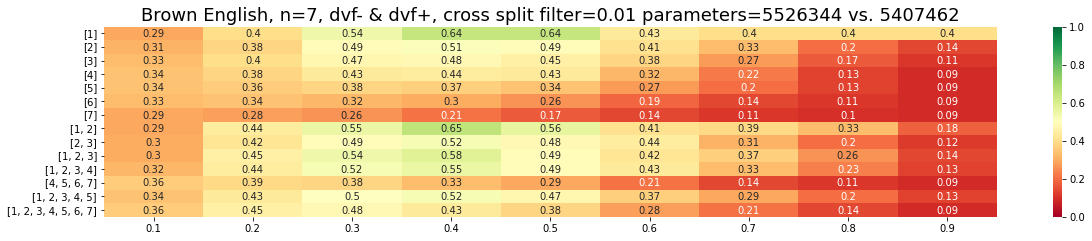

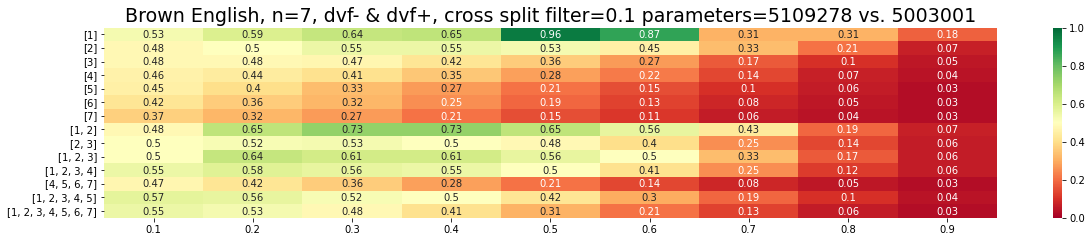

In [72]:
base1 = FreedomTokenizer(name='data/models/brown_en_chars_7_test1',max_n=7,mode='chars',debug=False)
base2 = FreedomTokenizer(name='data/models/brown_en_chars_7_test2',max_n=7,mode='chars',debug=False)
title = 'Brown English, n=7, dvf- & dvf+, cross split'
cross100_f_list_en = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base1.model,model_threshold)
        model_compress_with_loss(base2.model,model_threshold)
    parameters1 = base1.count_params()
    parameters2 = base2.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_en,
        FreedomBasedTokenizer(base1,'dvf-','dvf+'),
        FreedomBasedTokenizer(base2,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={} vs. {}".format(title,model_threshold,parameters1,parameters2))
    cross100_f_list_en.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base1
del base2


### Russian

In [62]:
path = 'data/corpora/Russian/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_ru = list(test_df['ru'])
print(len(test_ru))
test_ru


100


['Как насчет медицинской страховки? В случае вашей семьи, её можно оформить и взрослому и ребенку.',
 'Для тех, у кого есть страховка, по договору страхования они получат компенсацию в размере 300 тысяч рублей.',
 'Необходимо осознать важность наличия страховки.',
 'На самом деле, это явление действительно очень распространено, например, для страхования от несчастных случаев, чем больше вы покупаете, тем больше страхуете.',
 'Этому поколению родителей действительно необходимо покупать страховку.',
 'Ну, прямо сейчас действительно желательно купить страховку.',
 'Машину нужно покупать в полном объеме, а дом можно купить в кредит.',
 'Вы можете купить страховку, страховка, конечно же, делится на множество категорий.',
 'Медицинская страховка очень важна.',
 'Эту часть денег платит страховая компания.',
 'Послушайте, я не знаю, слышали ли вы когда-нибудь об этом, это страховка в Сбере.',
 'Покупка дома на самом деле является инвестицией.',
 'Вы когда-нибудь узнавали об обучении в Альфе?',

14724909


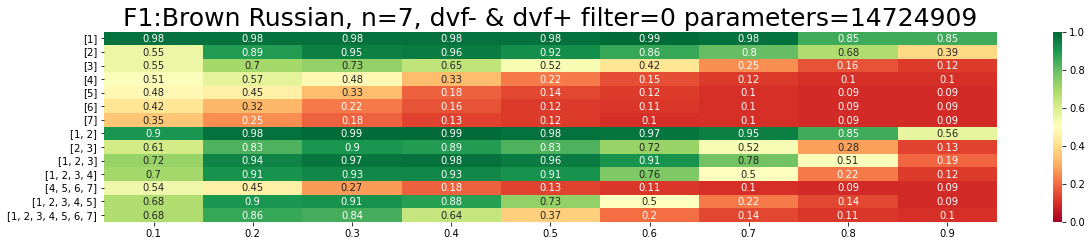

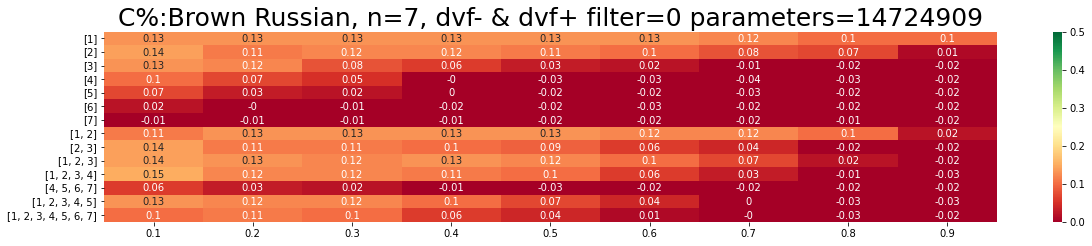

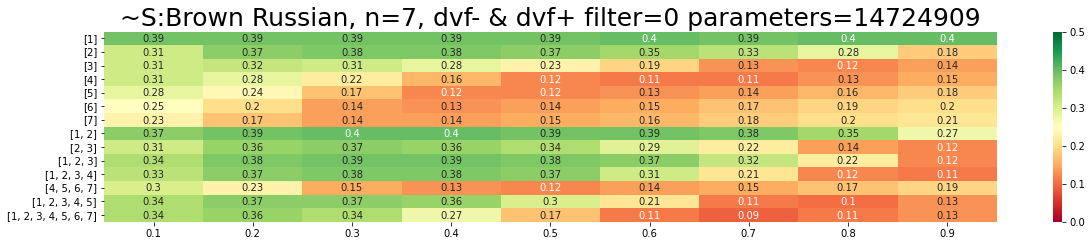

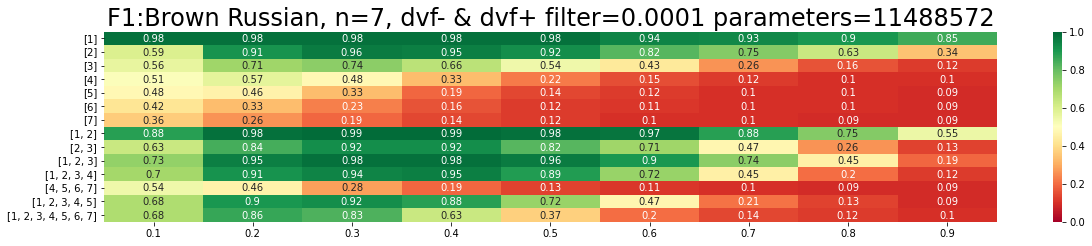

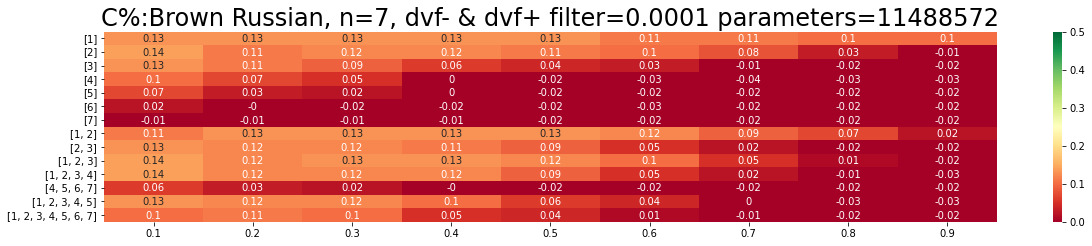

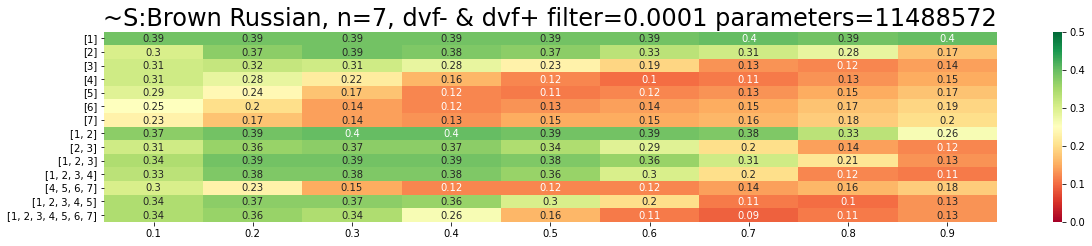

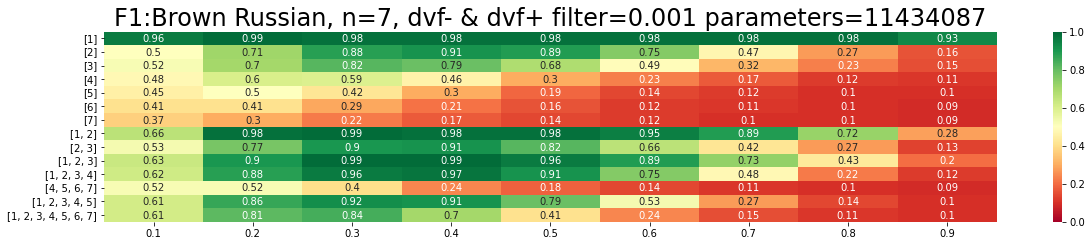

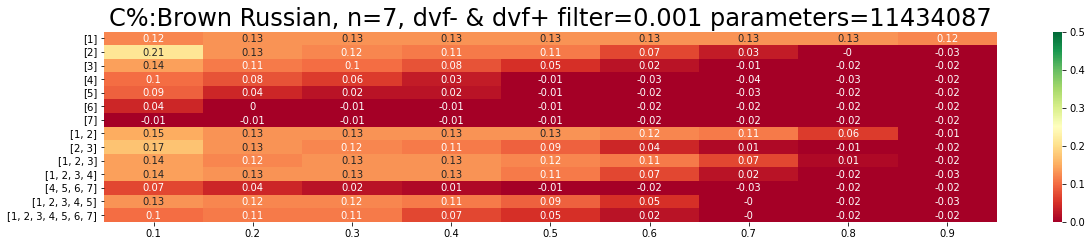

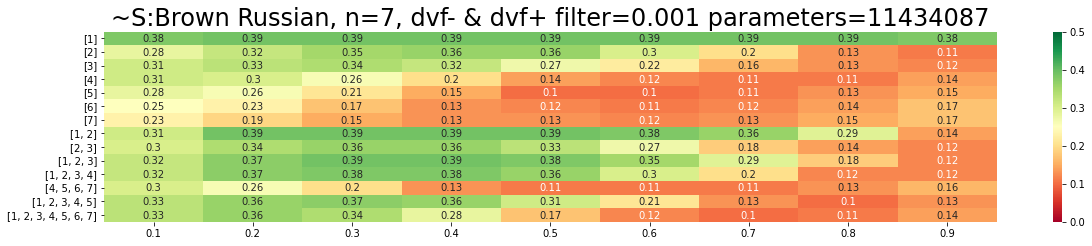

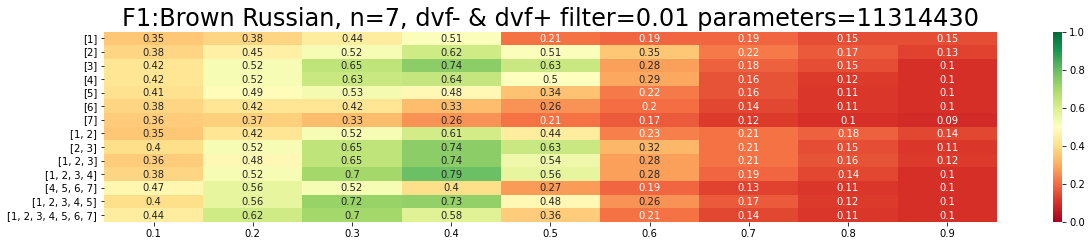

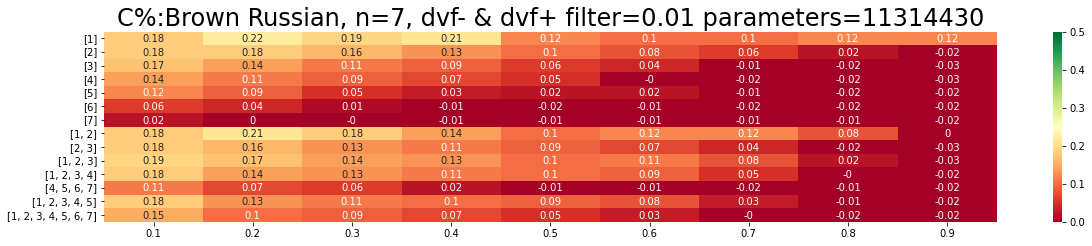

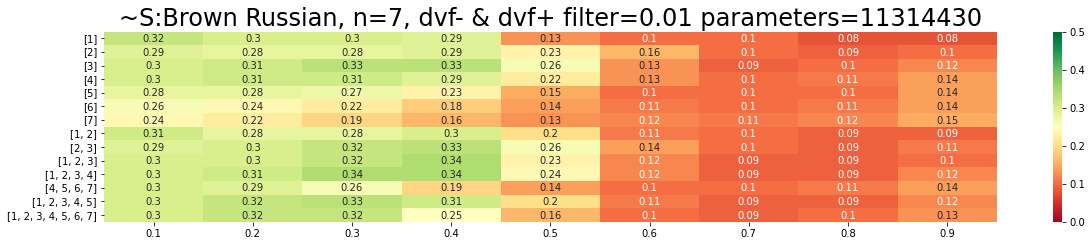

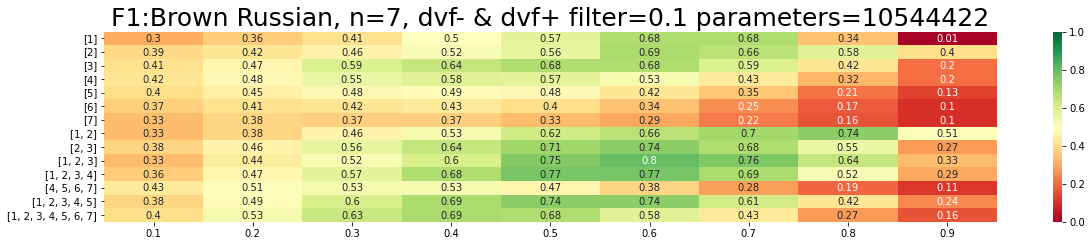

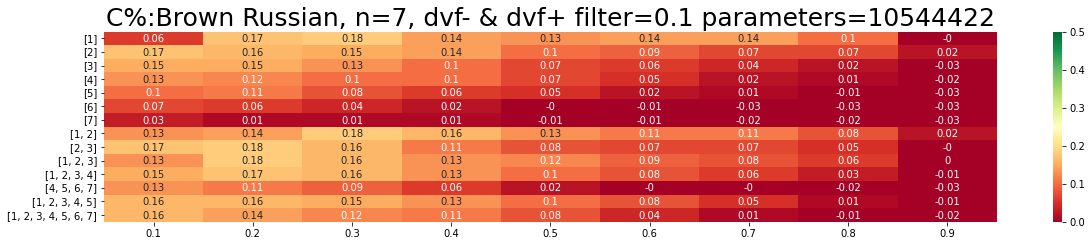

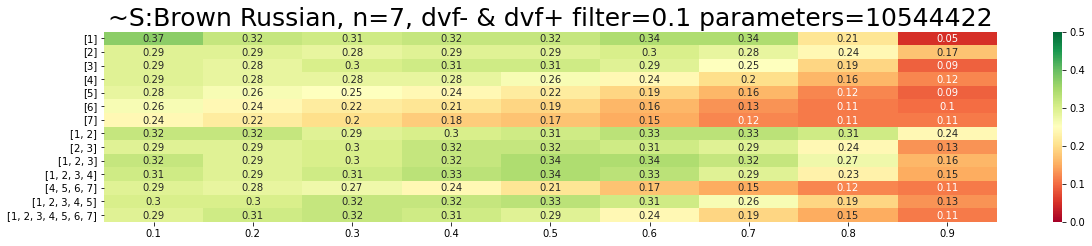

In [67]:
ref_tokenizer = DelimiterTokenizer()
model_thresholds = [0,0.0001,0.001,0.01,0.1]
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

base = FreedomTokenizer(name='data/models/brown_ru_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Russian, n=7, dvf- & dvf+'
metric100_list_ru = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_ru,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_ru.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


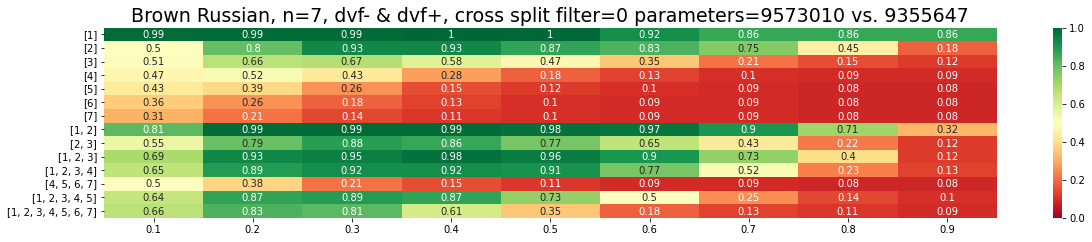

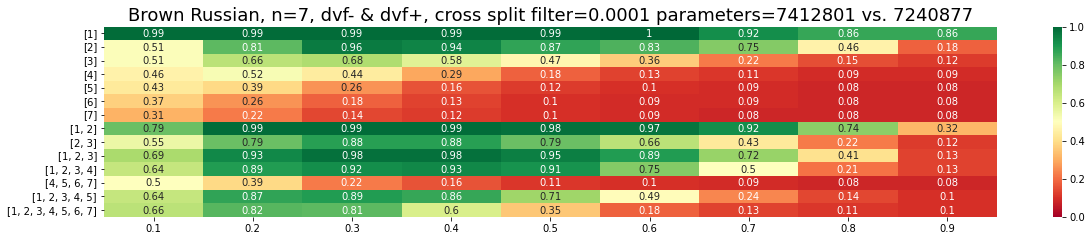

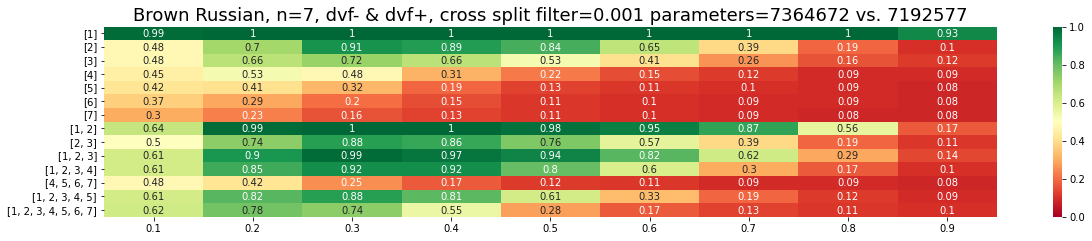

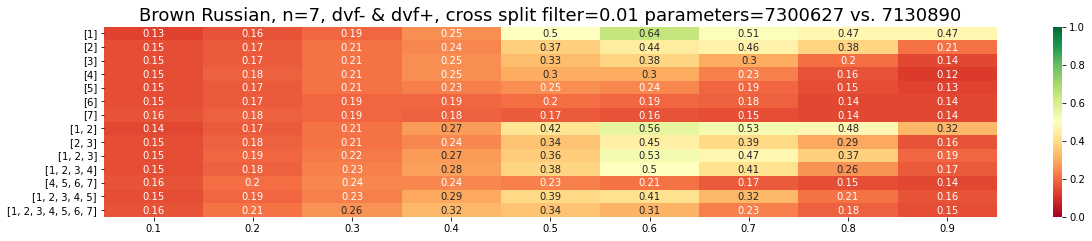

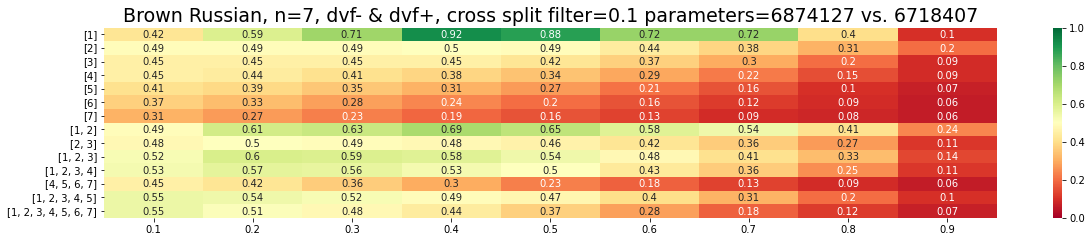

In [68]:
base1 = FreedomTokenizer(name='data/models/brown_ru_chars_7_test1',max_n=7,mode='chars',debug=False)
base2 = FreedomTokenizer(name='data/models/brown_ru_chars_7_test2',max_n=7,mode='chars',debug=False)
title = 'Brown Russian, n=7, dvf- & dvf+, cross split'
cross100_f_list_ru = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base1.model,model_threshold)
        model_compress_with_loss(base2.model,model_threshold)
    parameters1 = base1.count_params()
    parameters2 = base2.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_ru,
        FreedomBasedTokenizer(base1,'dvf-','dvf+'),
        FreedomBasedTokenizer(base2,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={} vs. {}".format(title,model_threshold,parameters1,parameters2))
    cross100_f_list_ru.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base1
del base2


### Chinese 

In [69]:
path = '../../nlp/corpora/Chinese/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_zh = list(test_df['zh'])
print(len(test_zh))
test_zh


100


['然后医疗保险呢？就是我们家，不论是大人啊还是小孩都会去买一个保险',
 '当他们买了保险的，按照保险合同的话，是要赔三十万的',
 '需要意识到买了一个保险的重要性',
 '其实这种现象是真的很普遍，因为比如说你买一个人身意外险你那个你买的越多你那个保额就越多',
 '这代父母真的很有必要去买一个保险',
 '嗯，对现在就是说很提倡买保险',
 '车一定要全款买，房子可以贷款买',
 '可以去买保险，保险当然分为很多类',
 '医疗保险还是很重要的',
 '就是保险公司来出这一部分钱',
 '相互宝，我不知道你有没有了解过，它是支付宝里面的一种保险',
 '买房子其实也就是一个投资',
 '你有没有去了解过平安保险公司的培训啊',
 '如果要是存银行的话，利息利滚利是多少',
 '这个保险在西方国家已经很成熟了',
 '保险行业很多啊，你看它覆盖的面积特别广',
 '但是，其实也是在鼓励你买商业保险和人寿保险',
 '卖保险的都是靠的人脉',
 '呃，你买的社保也是保险呀，然后你的车险也是保险呀',
 '但是银行的钱，你如果是拿出来的话，属于是一种贷款',
 '现在好像转向那个负利率',
 '借银行的钱，我真的没试过',
 '他是没有利息的，所以他就把它放出去，以后再收回来',
 '如果是你征信不好的话，他也不会给钱你用',
 '是他是贷款买的还是全款',
 '嗯，他们就是就是有时候办一张银行卡的时候，程序特别多',
 '各种银行，还有五大银行',
 '国债券也算是证券的一种吗',
 '其实做股票的话嗯相它是算是风险系数比较高的',
 '嗯收益不会太高就跟银行利率是差不多的',
 '然后就用来炒房用啊，等它升值了之后卖一套房，然后还清贷款，可能自己还赚了那个几十万',
 '入投资入门的话，第一步就是说你要掌握基础知识',
 '汇率的标价方式还有他的直接标价法和间接标价法',
 '它始终是一种投资的行为，投资的模式，投资的方式',
 '如果有闲钱呢买一套公寓来投资呢？',
 '变成资金，投资其他的方面',
 '有了贷款就有了压力，也就有了挣钱的动力，这个我也认同',
 '方不方便开通网上银行啊',
 '那你上次投资的钱从哪来的',
 '银行的政策的改变让他们不能贷款了',
 '保险公司呢它也有理财产品的',
 '好像我们那个保险公司是两点八的利息保底',
 '所以

In [101]:
ref_tokenizer = JiebaTokenizer()

model_thresholds = [0,0.0001,0.001,0.01,0.1]
ngram_params = [[1],[2],[3],[4],[5],[6],[7],[1,2],[2,3],[1,2,3],[1,2,3,4],[4,5,6,7],[1,2,3,4,5],[1,2,3,4,5,6,7]]


26079635


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/lb/1m7gbdp17h578qq48pbbtxf40000gn/T/jieba.cache
Loading model cost 0.718 seconds.
Prefix dict has been built successfully.


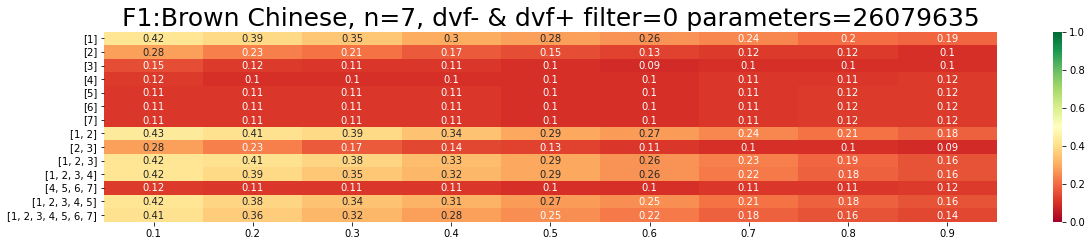

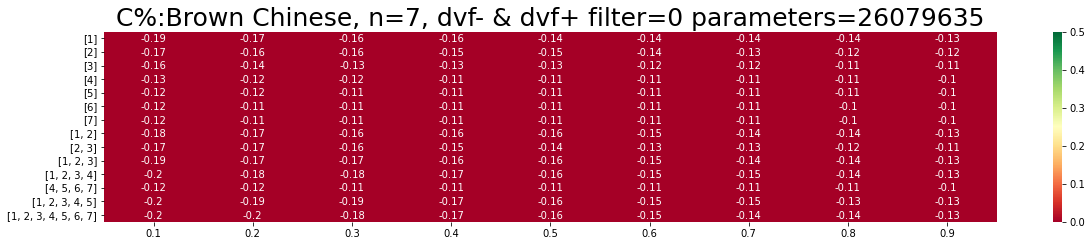

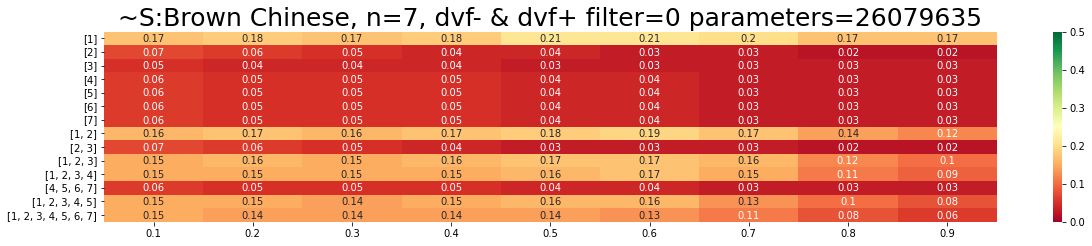

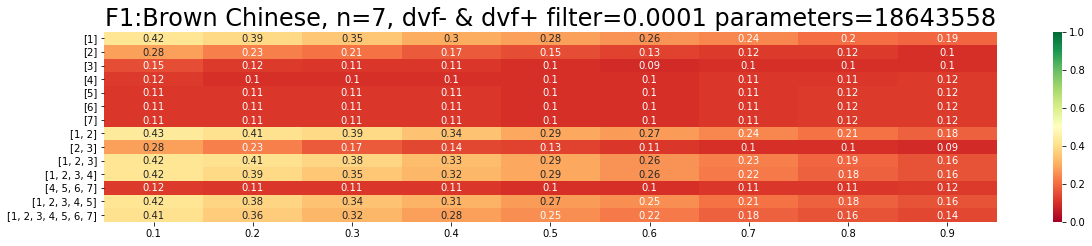

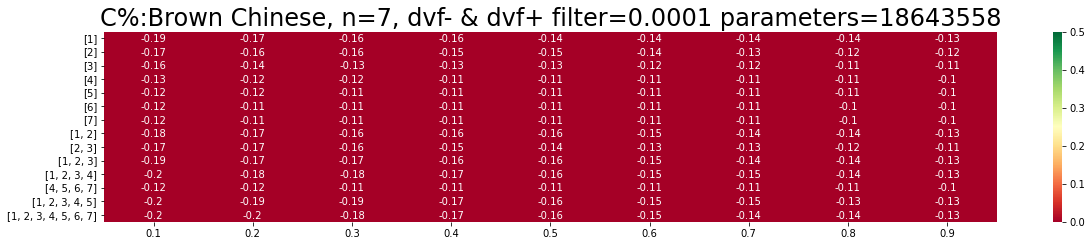

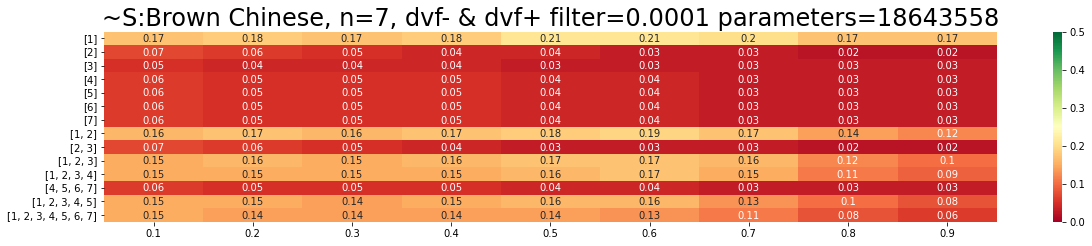

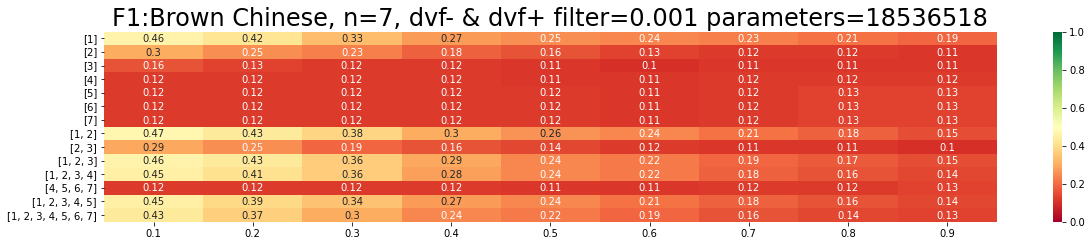

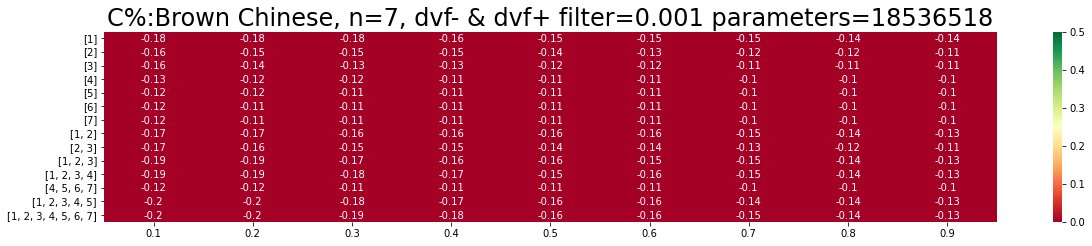

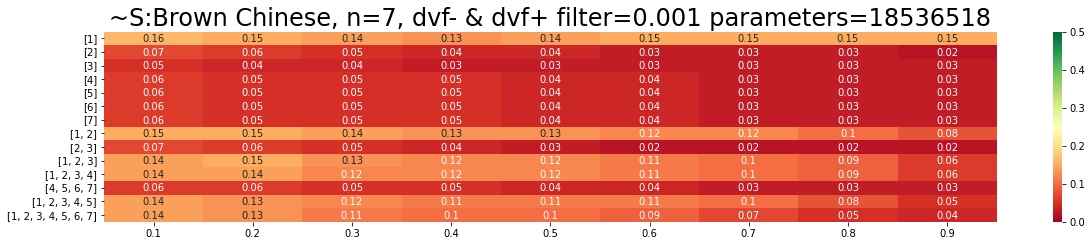

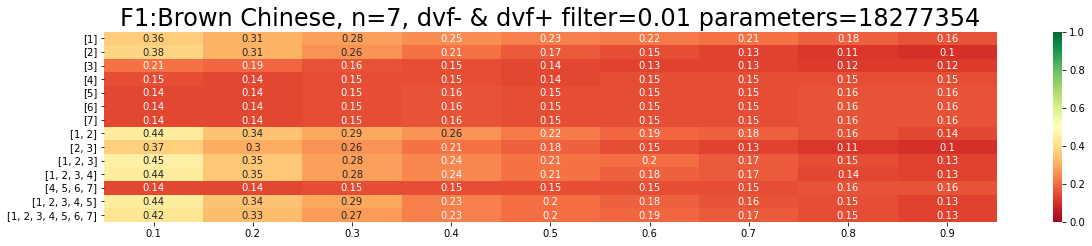

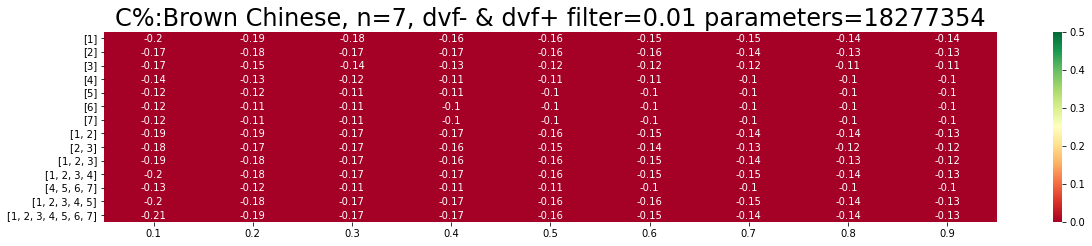

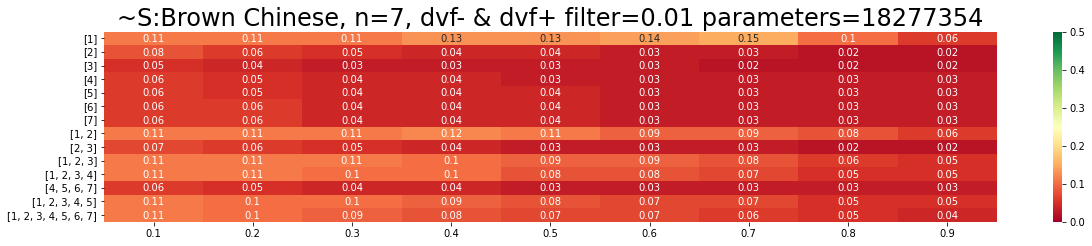

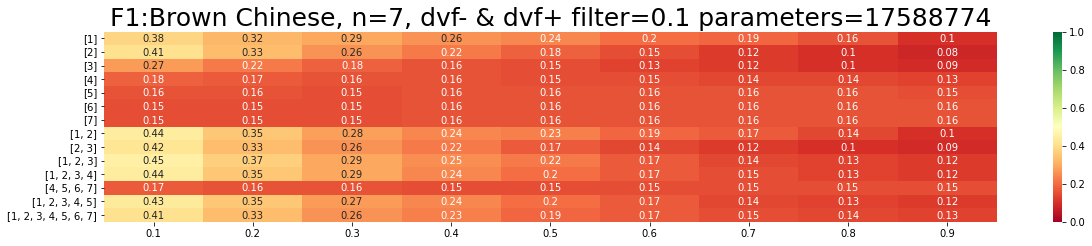

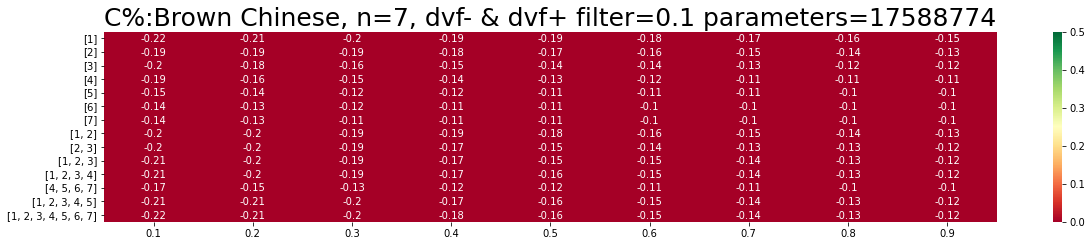

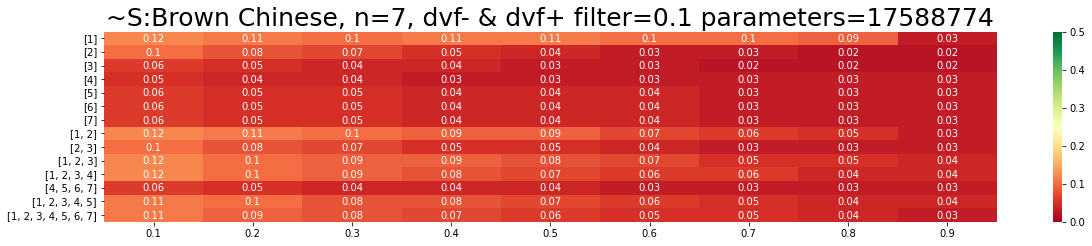

In [74]:
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
#token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base = FreedomTokenizer(name='data/models/brown_zh_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Chinese, n=7, dvf- & dvf+'
metric100_list_zh_dvft1 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_zh,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_zh_dvft1.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


26079635


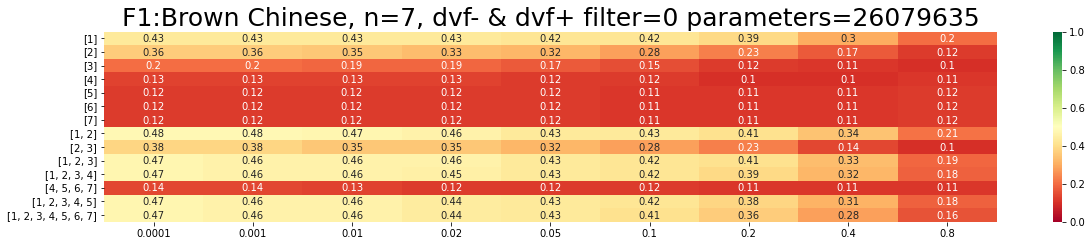

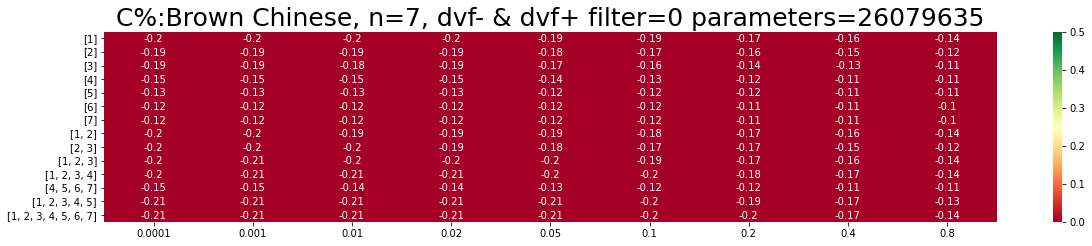

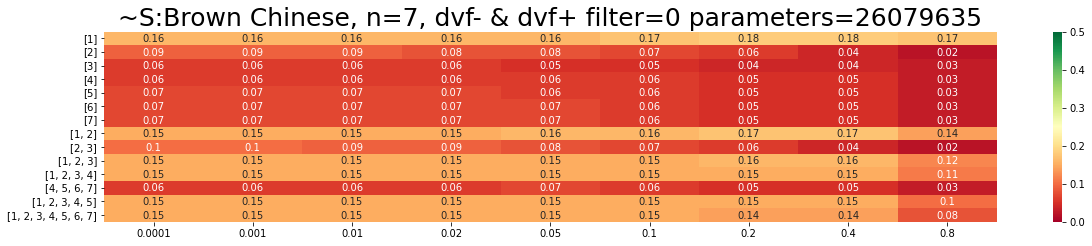

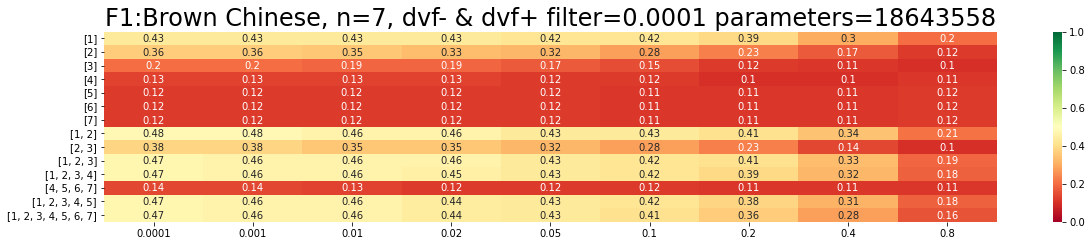

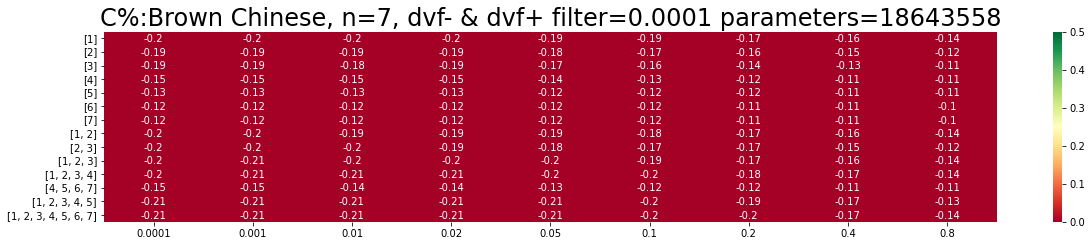

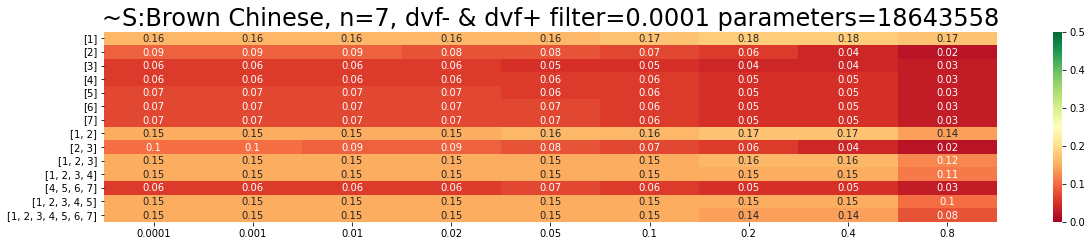

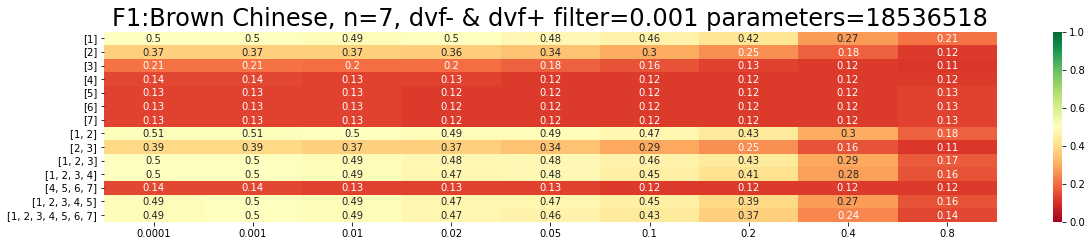

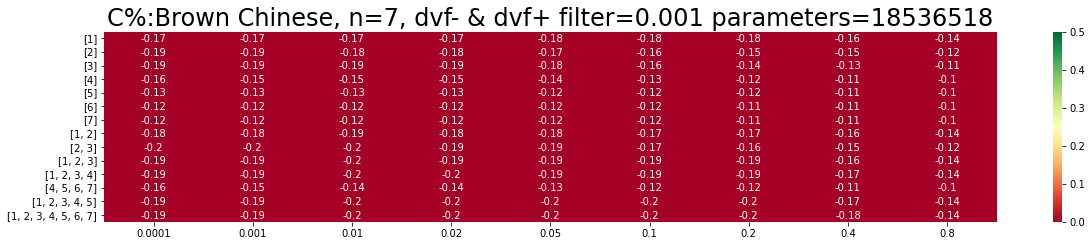

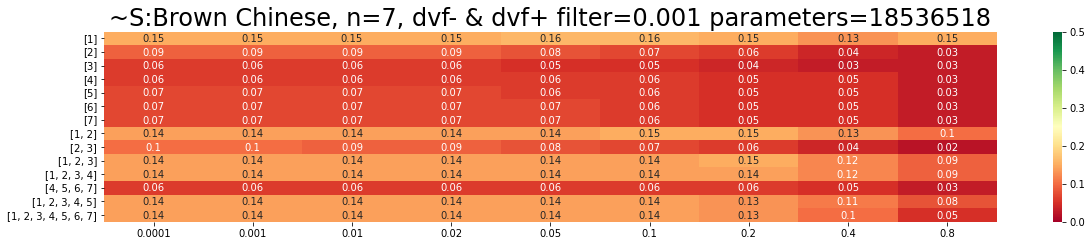

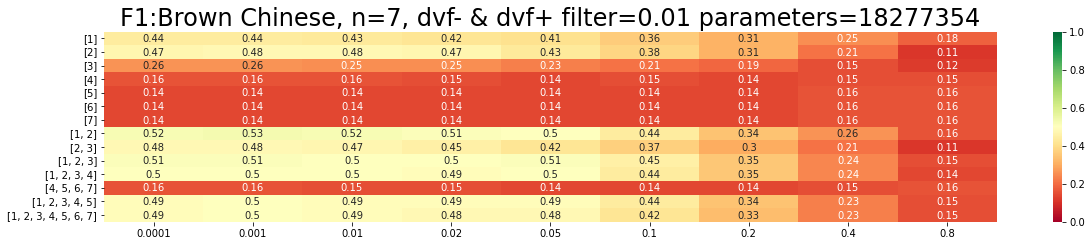

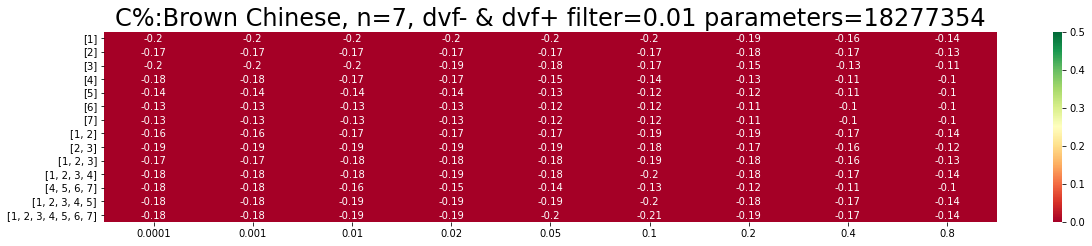

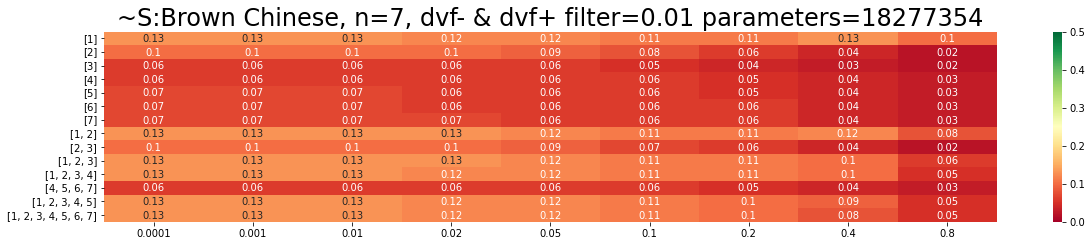

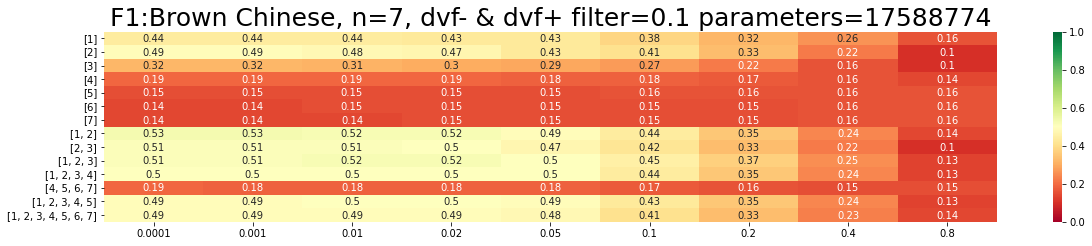

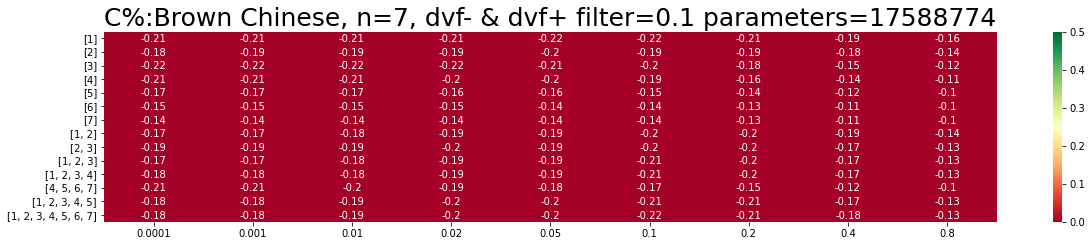

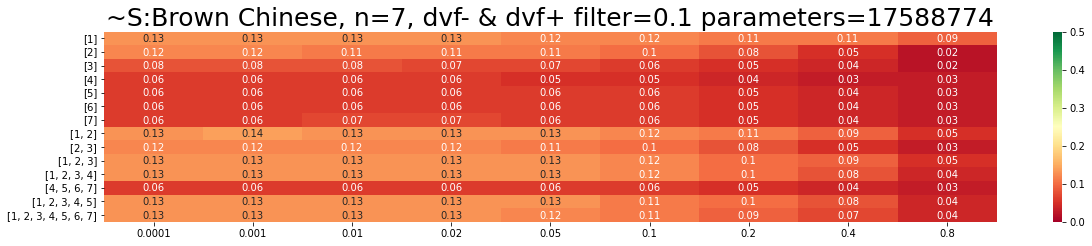

In [75]:
#token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base = FreedomTokenizer(name='data/models/brown_zh_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Chinese, n=7, dvf- & dvf+'
metric100_list_zh_dvft01 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_zh,ref_tokenizer,FreedomBasedTokenizer(base,'dvf-','dvf+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_zh_dvft01.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


26079635


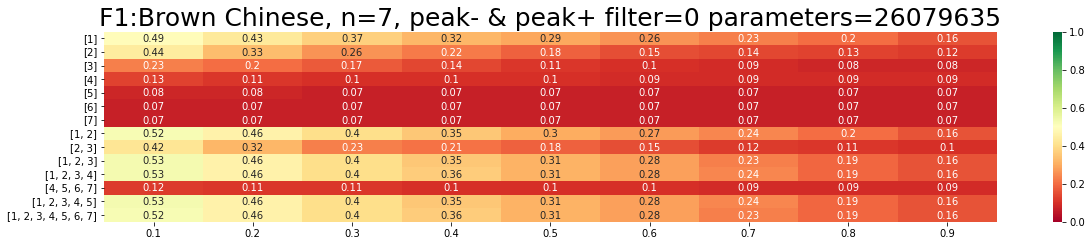

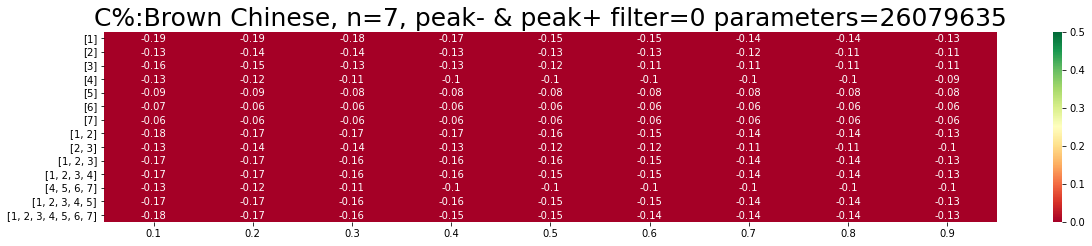

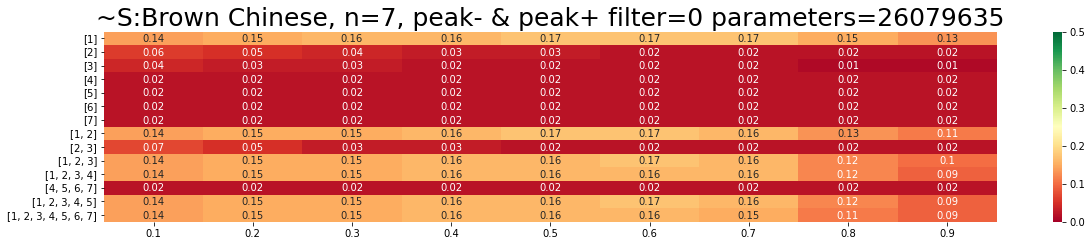

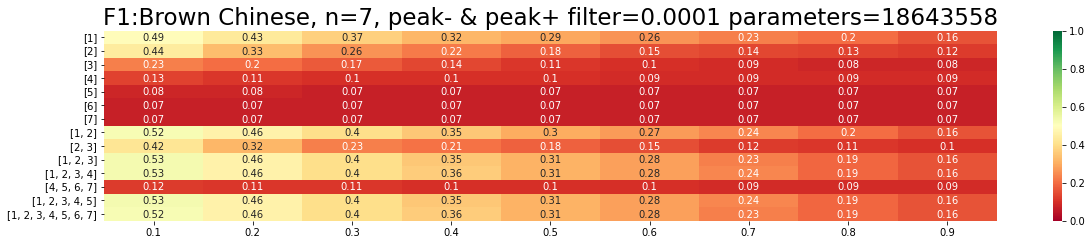

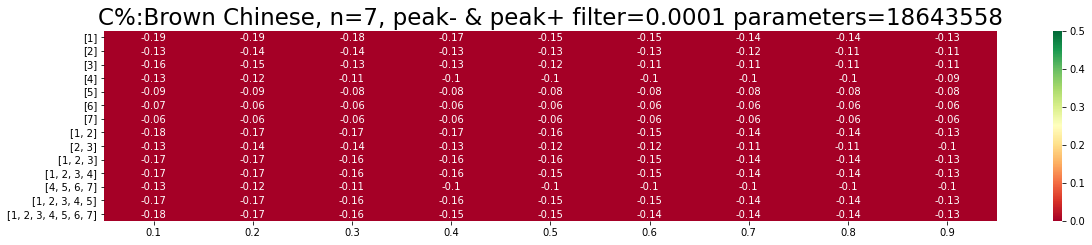

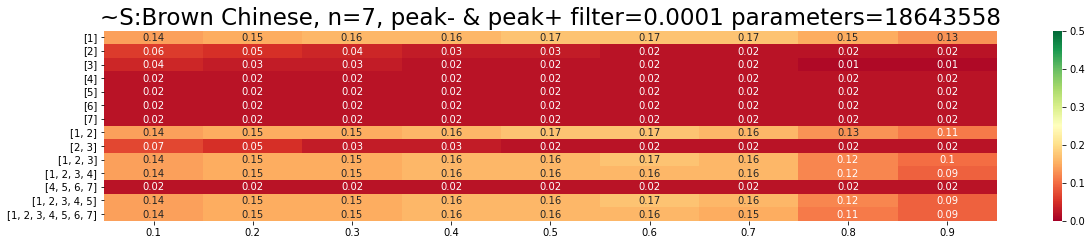

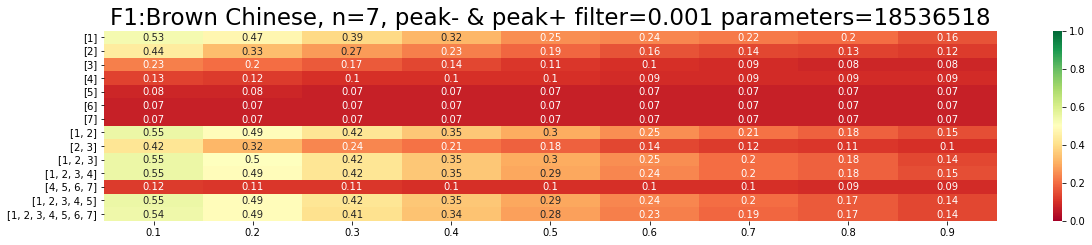

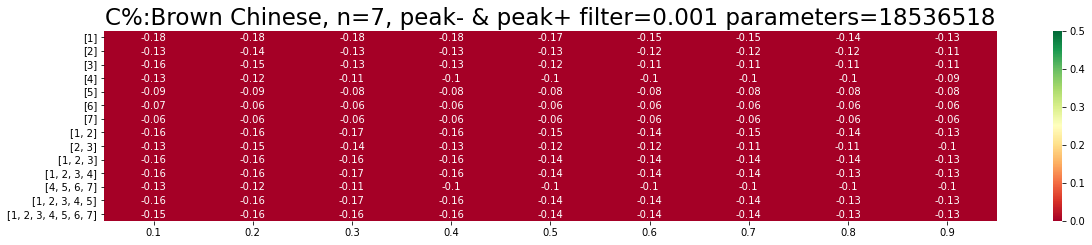

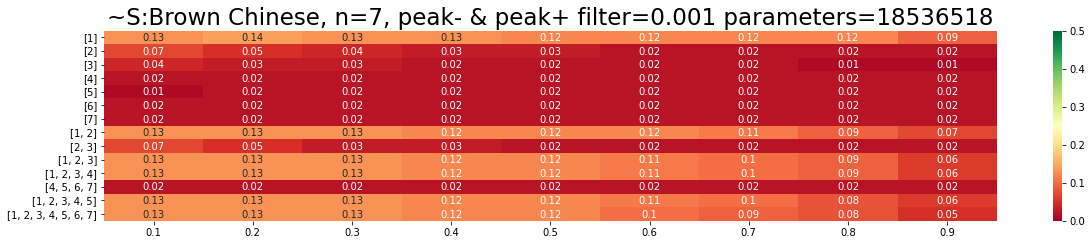

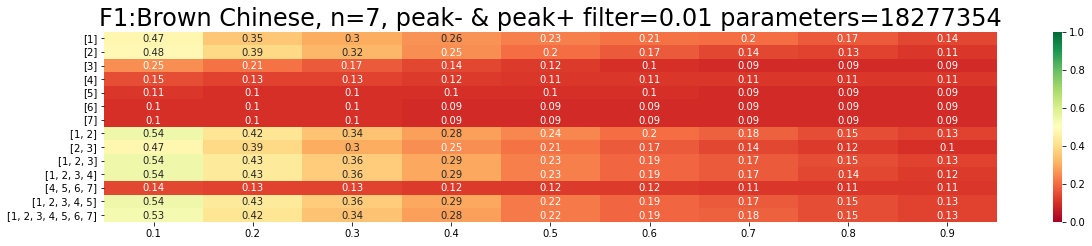

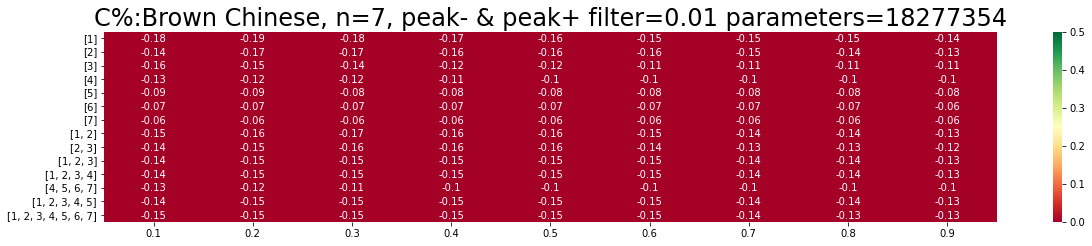

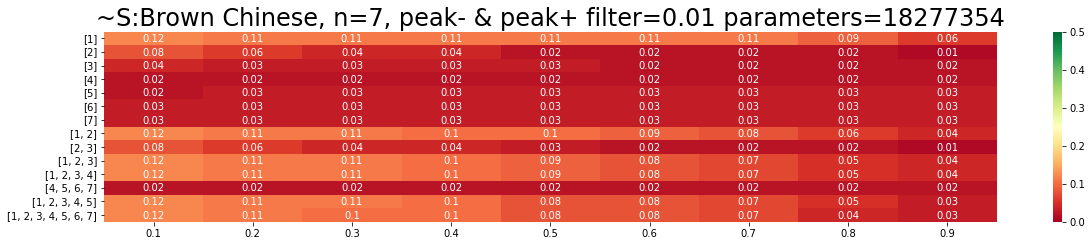

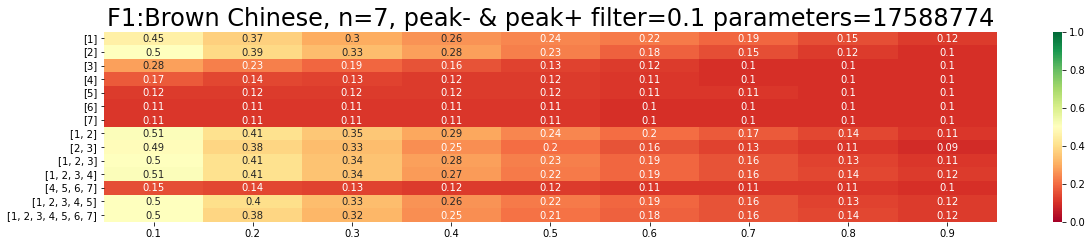

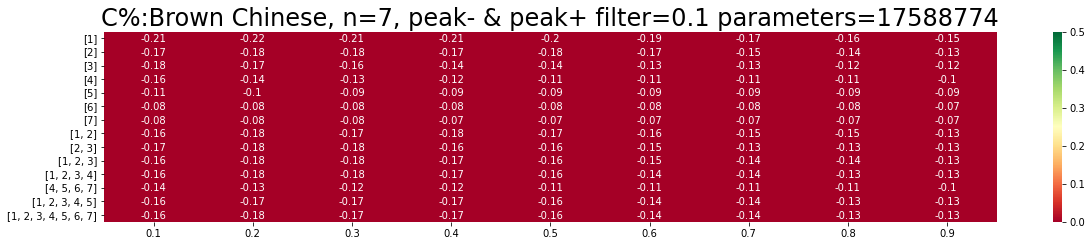

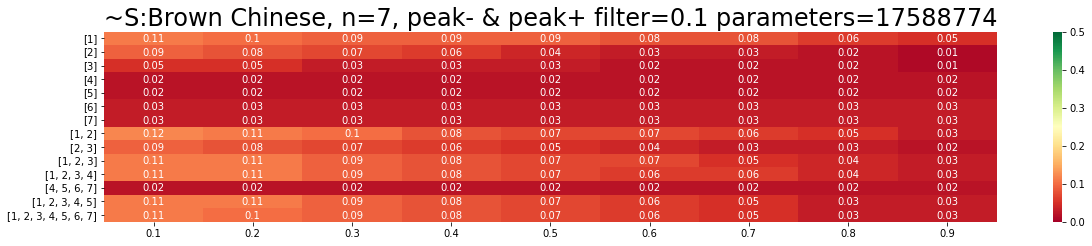

In [76]:
token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
#token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base = FreedomTokenizer(name='data/models/brown_zh_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Chinese, n=7, peak- & peak+'
metric100_list_zh_peakt1 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_zh,ref_tokenizer,FreedomBasedTokenizer(base,'peak-','peak+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_zh_peakt1.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


26079635


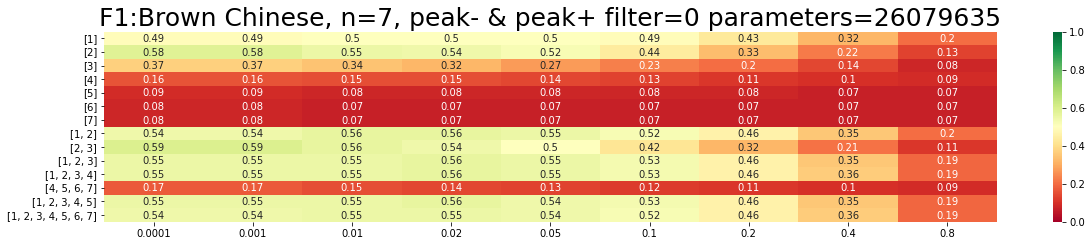

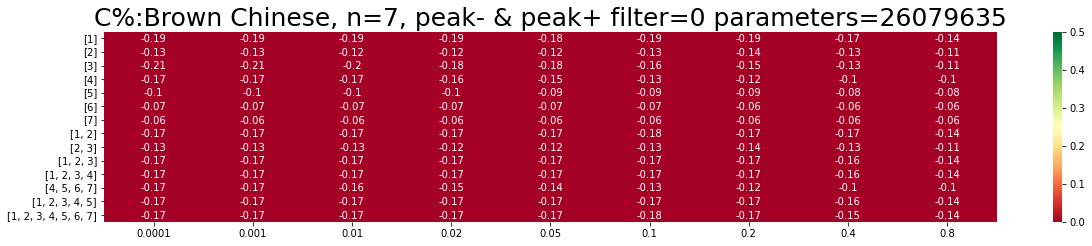

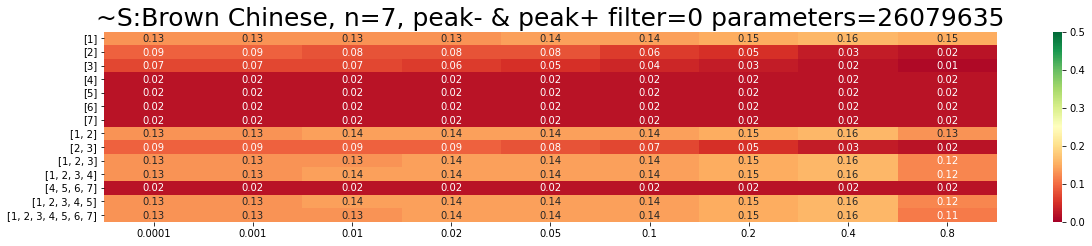

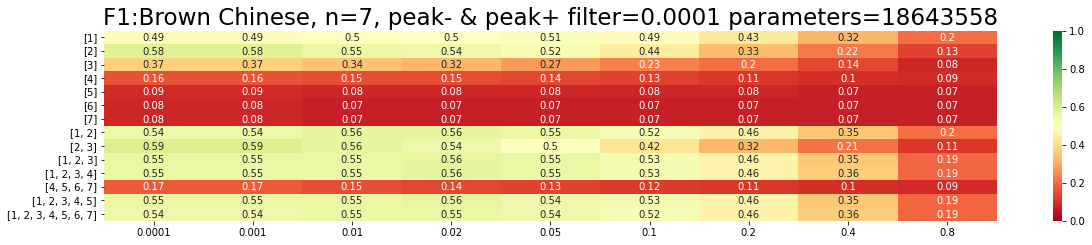

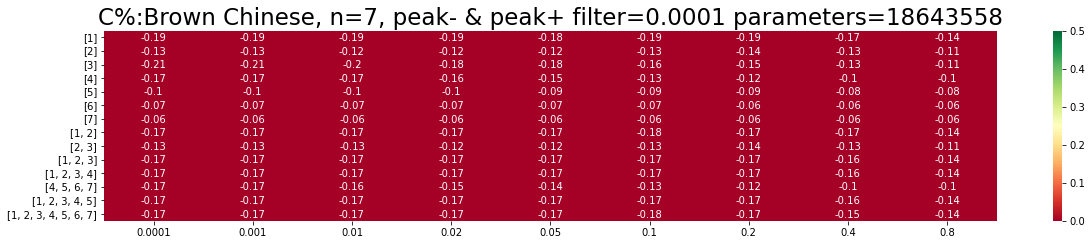

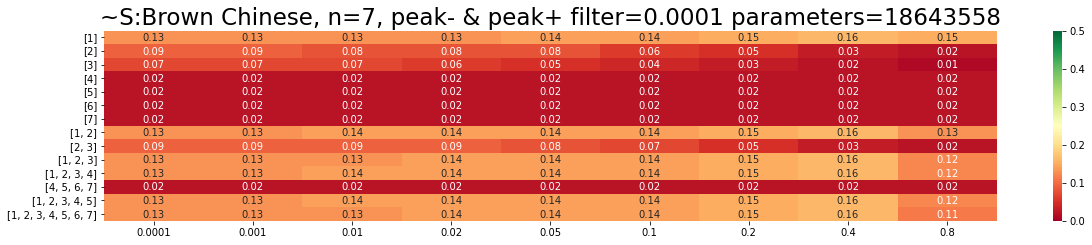

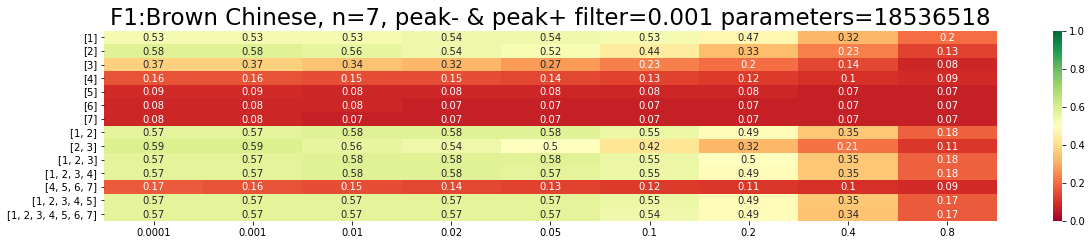

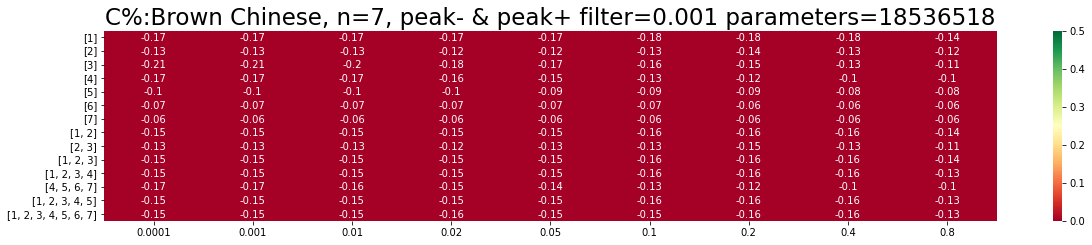

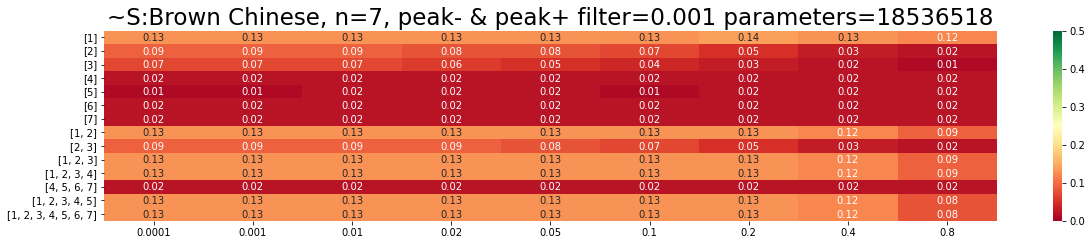

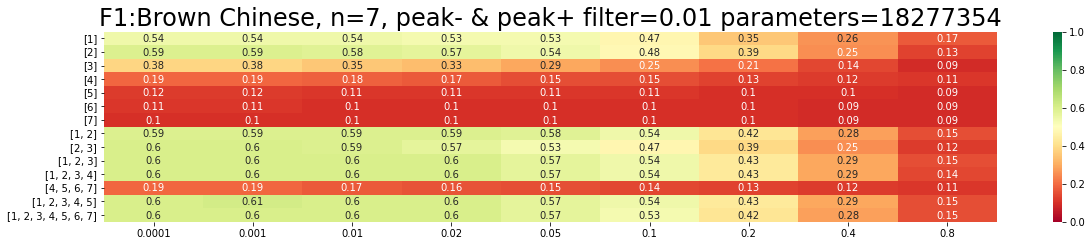

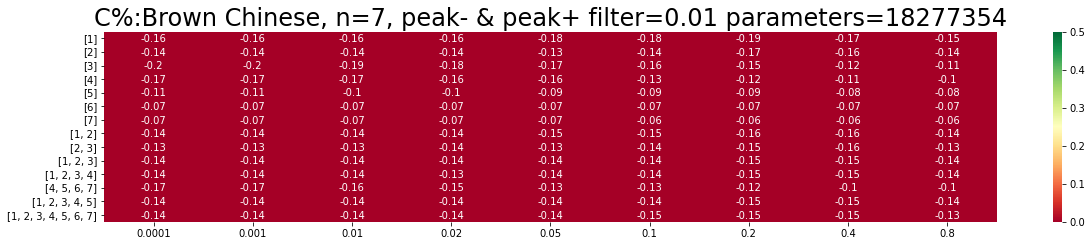

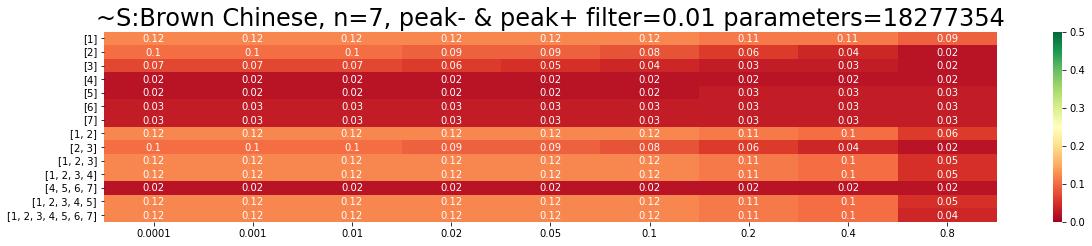

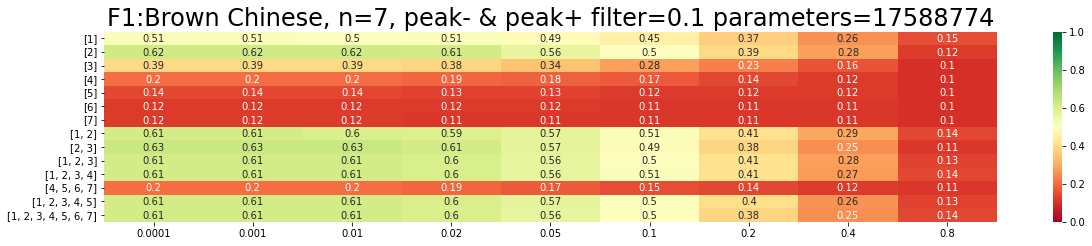

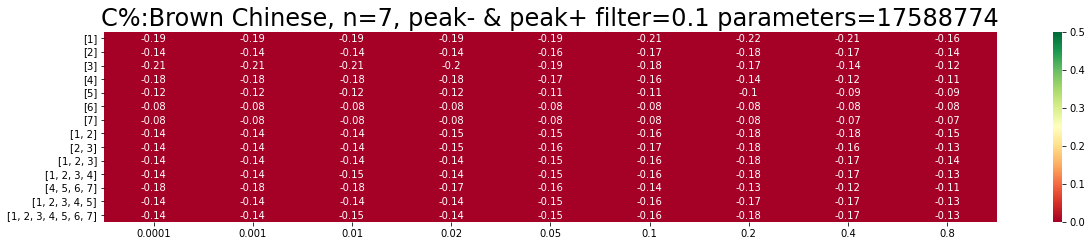

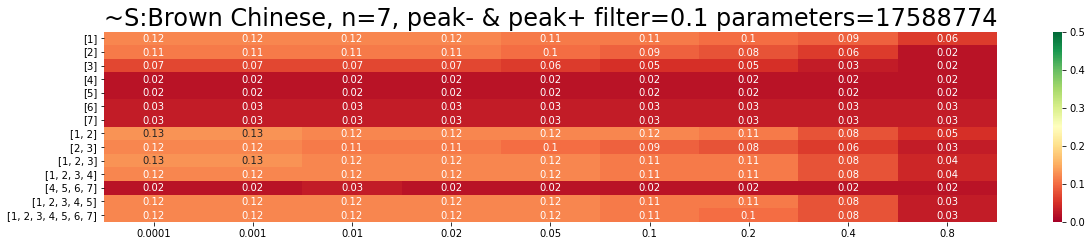

In [77]:
#token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base = FreedomTokenizer(name='data/models/brown_zh_chars_7',max_n=7,mode='chars',debug=False)
print(base.count_params())
title = 'Brown Chinese, n=7, peak- & peak+'
metric100_list_zh_peakt01 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base.model,model_threshold)
    parameters = base.count_params()
    metrics = evaluate_freedom_tokenizer_multimetrics(test_zh,ref_tokenizer,FreedomBasedTokenizer(base,'peak-','peak+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={}".format(title,model_threshold,parameters))
    metric100_list_zh_peakt01.extend([(model_threshold,m[0],m[1],m[2],m[3],m[4]) for m in metrics])
del base


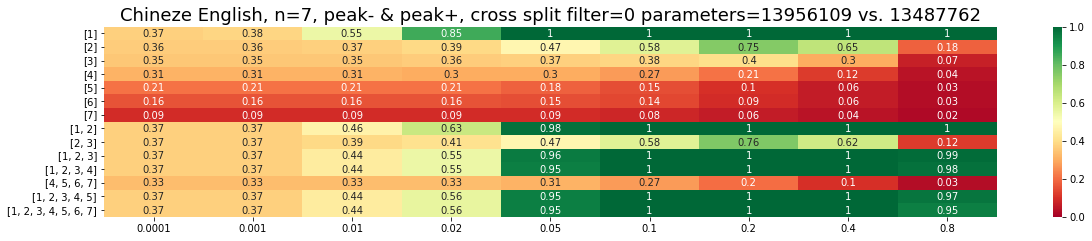

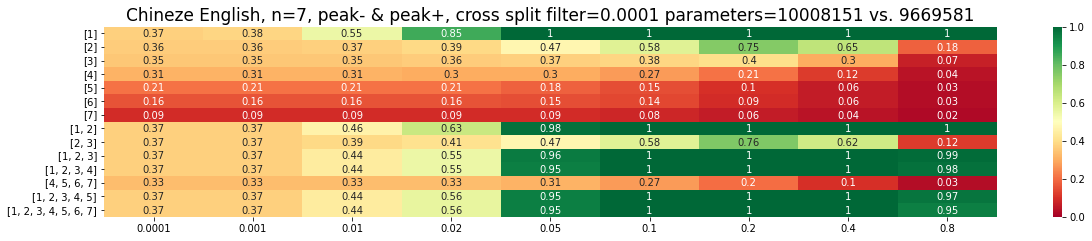

In [ ]:
#token_thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # en/ru
token_thresholds = [0.0001,0.001,0.01,0.02,0.05,0.1,0.2,0.4,0.8] # zh

base1 = FreedomTokenizer(name='data/models/brown_zh_chars_7_test1',max_n=7,mode='chars',debug=False)
base2 = FreedomTokenizer(name='data/models/brown_zh_chars_7_test2',max_n=7,mode='chars',debug=False)
title = 'Chineze English, n=7, peak- & peak+, cross split'
cross100_f_list_zh_peakt01 = []
for model_threshold in model_thresholds:
    if model_threshold > 0:
        model_compress_with_loss(base1.model,model_threshold)
        model_compress_with_loss(base2.model,model_threshold)
    parameters1 = base1.count_params()
    parameters2 = base2.count_params()
    metrics = evaluate_freedom_tokenizer_options(test_en,
        FreedomBasedTokenizer(base1,'peak-','peak+'),
        FreedomBasedTokenizer(base2,'peak-','peak+'),
        ngram_params,token_thresholds,title="{} filter={} parameters={} vs. {}".format(title,model_threshold,parameters1,parameters2))
    cross100_f_list_zh_peakt01.extend([(model_threshold,m[0],m[1],m[2]) for m in metrics])
del base1
del base2


In [95]:
def summarise_metrics(metric_list,cross_f_list):
    m_df = pd.DataFrame(metric_list,columns=['MT','NG','TT','F1','C%','~S'])
    m_cross_df = pd.DataFrame(cross_f_list,columns=['MT','NG','TT','CSF1'])

    m_df['CSF1'] = m_cross_df['CSF1']
    m_df['C%+~S'] = (m_df['C%'] + m_df['~S'])/2
    m_df['C%*~S'] = (m_df['C%'] * m_df['~S'])
    m_df['CSF1+~S'] = (m_df['CSF1'] + m_df['~S'])/2
    m_df['CSF1*~S'] = (m_df['CSF1'] * m_df['~S'])
    m_df['CSF1+C%'] = (m_df['CSF1'] + m_df['C%'])/2
    m_df['CSF1*C%'] = (m_df['CSF1'] * m_df['C%'])
    m_df['CSF1+~S+C%'] = (m_df['CSF1'] + m_df['~S'] + m_df['C%'])/3
    m_df['CSF1*~S*C%'] = (m_df['CSF1'] * m_df['~S'] * m_df['C%'])

    print('CSF1 X ~S',m_df['CSF1'].corr(m_df['~S']))
    print('CSF1 X C%',m_df['CSF1'].corr(m_df['C%']))
    print('~S X C%',m_df['~S'].corr(m_df['C%']))

    top_df = None
    for m in ['CSF1','~S','C%','CSF1+~S','CSF1*~S','CSF1+C%','CSF1*C%','C%+~S','C%*~S','CSF1+~S+C%','CSF1*~S*C%']:
        df = m_df.sort_values(by=[m,'F1'],ascending=False)[['F1']][:1]
        df.insert(0,'metric',[m])
        df.insert(2,'corr',[round(m_df['F1'].corr(m_df[m]),2)])
        if top_df is None:
            top_df = df
        else:
            top_df = top_df.append(df)
    top_df.sort_values(by=['F1','corr','metric'],ascending=False,inplace=True)
    return m_df, top_df


def plot_multi_bars(m_df, top_df, title):
    plot_bars(top_df,'metric',['F1','corr'],title=title,fontsize=12)
    plt.show()

    fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

    axs[0].scatter(m_df['~S'], m_df['F1'], c ="blue", marker ="s")
    axs[0].set_xlabel("~S")
    axs[0].set_ylabel("F1")


    axs[1].scatter(m_df['C%'], m_df['F1'], c ="blue", marker ="s")
    axs[1].set_xlabel("C%")
    axs[1].set_ylabel("F1")

    axs[2].scatter(m_df['CSF1'], m_df['F1'], c ="blue", marker ="s")
    axs[2].set_xlabel("CSF1")
    axs[2].set_ylabel("F1")

    axs[3].scatter(m_df['CSF1+~S+C%'], m_df['F1'], c ="blue", marker ="s")
    axs[3].set_xlabel("CSF1+~S+C%")
    axs[3].set_ylabel("F1")

    p = fig.suptitle(title+': F1 as function of ~S, C% and CSF1 used for hyper-parameter selection')   


In [97]:
m_df, top_df = summarise_metrics(metric100_list_en,cross100_f_list_en)
top_df


CSF1 X ~S 0.9080426382546926
CSF1 X C% 0.8093420370410254
~S X C% 0.8049273088493812


metric    F1  corr
256  CSF1+~S+C%  0.99  0.95
256     CSF1+~S  0.99  0.95
256        CSF1  0.99  0.94
256     CSF1+C%  0.99  0.93
256     CSF1*~S  0.99  0.93
130       C%*~S  0.99  0.93
130       C%+~S  0.99  0.92
256  CSF1*~S*C%  0.99  0.91
256     CSF1*C%  0.99  0.90
133          ~S  0.95  0.94
510          C%  0.01  0.79

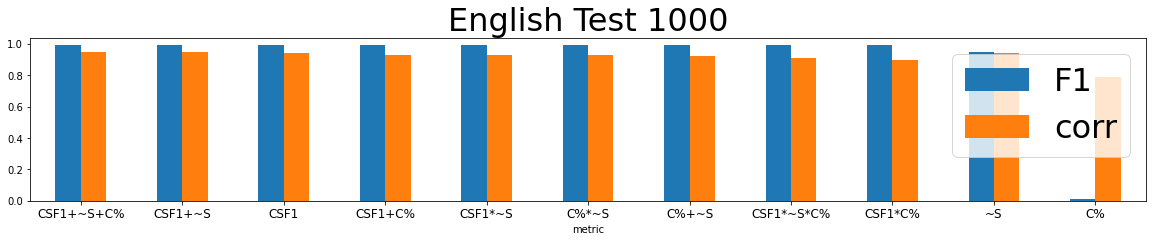

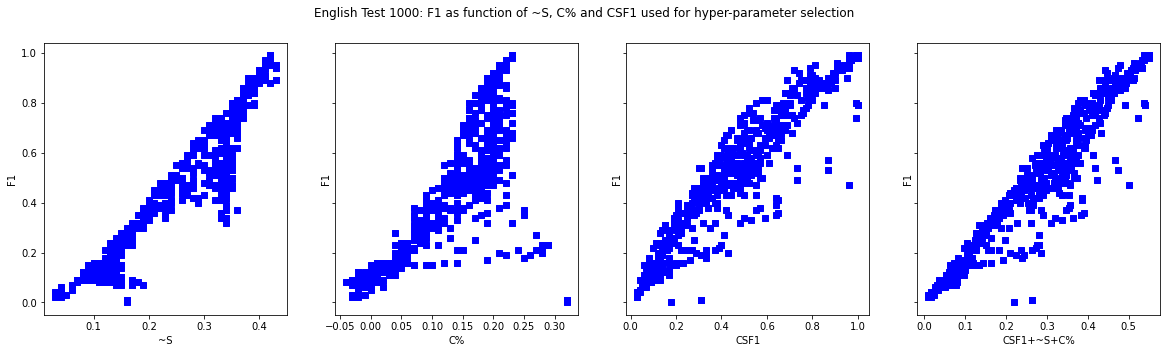

In [98]:
plot_multi_bars(m_df, top_df, 'English Test 1000')


In [99]:
m_df, top_df = summarise_metrics(metric100_list_ru,cross100_f_list_ru)
top_df


CSF1 X ~S 0.8248829494034811
CSF1 X C% 0.6996834044855531
~S X C% 0.8298717345023114


metric    F1  corr
65   CSF1+~S+C%  0.99  0.94
65      CSF1+~S  0.99  0.94
5            ~S  0.99  0.93
65      CSF1*~S  0.99  0.92
253     CSF1+C%  0.99  0.91
253        CSF1  0.99  0.89
5         C%+~S  0.99  0.89
65   CSF1*~S*C%  0.99  0.86
253     CSF1*C%  0.99  0.85
379       C%*~S  0.38  0.81
379          C%  0.38  0.74

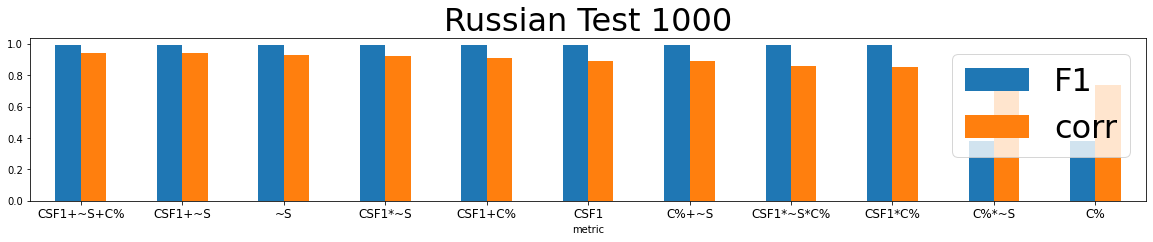

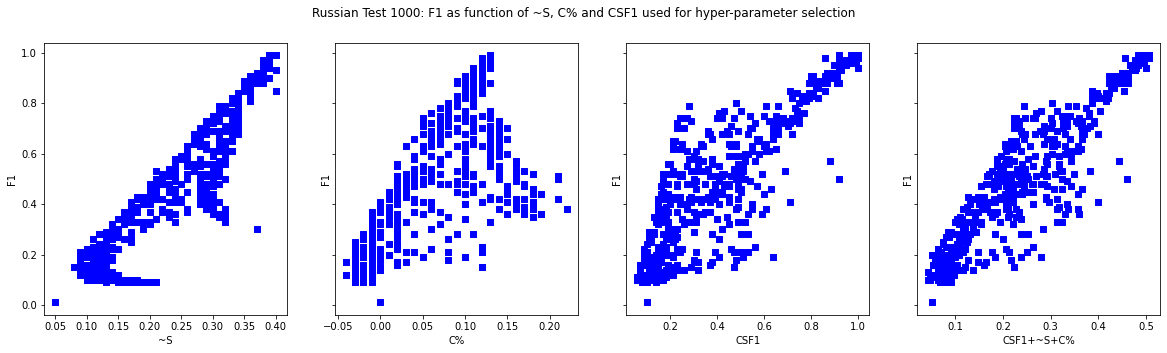

In [100]:
plot_multi_bars(m_df, top_df, 'Russian Test 1000')


In [ ]:
m_df, top_df = summarise_metrics(metric100_list_zh_peakt01,cross100_f_list_zh_peakt01)
top_df


In [ ]:
plot_multi_bars(m_df, top_df, 'Chinese Test 1000')


In [ ]:
#TODO en/ru dvf 100 (PROGRESS)
#TODO zh dvf/peak 100 (PROGRESS)
#TODO zh peak 100
#TODO en/ru/zh 1000 

#TODO https://magichub.com/datasets/chinese-english-parallel-corpus-finance/ - Creative Commons!? (email sent)

#summary
#TODO en/ru peak 100/1000 (PROGRESS)
